In [889]:
import pandas as pd
import numpy as np
from skimpy import clean_columns
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import savefig
from scipy import stats
import scikit_posthocs as sp

In [890]:
pal = sns.color_palette('crest')
pal.as_hex()[:]

['#7dba91', '#59a590', '#40908e', '#287a8c', '#1c6488', '#254b7f']

- The wire mesh vs. adults graph is in 2024_wire_mesh.ipynb

# Wire Mesh Data

In [1009]:
wm_2023 = pd.read_csv('../../2023/Data/2023_wire_mesh_clean.csv')
wm_2023['total_phorids'] = wm_2023['total_phorid_maggots'] + wm_2023['total_phorid_pupae']
wm_2023 = wm_2023.rename(columns={'total_scm_maggots':'scm_larvae_sum', 'record_id':'field_id',
       'total_scm_pupae':'scm_pupae_sum', 'number_wireworm':'wireworms'}).drop(['id', 'container_number', 'project', 'total_phorid_maggots', 'total_phorid_pupae', 'other_seeds'], axis=1)
wm_2023['total_scm'] = wm_2023['scm_larvae_sum'] + wm_2023['scm_pupae_sum']
wm_2023

,number_seeds,scm_larvae_sum,collection_date,field_id,seed_type,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm
0,10.0,0,4/18/23,POV_DUN,Corn,0,1,0,0,0
1,11.0,1,4/18/23,POV_DUN,Bean,0,2,1,10,1
2,5.0,0,4/18/23,DIP_CUR,Bean,17,0,0,0,17
3,9.0,0,4/18/23,DIP_CUR,Corn,0,2,0,0,0
4,10.0,0,4/18/23,DIP_PAT,Corn,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
277,10.0,0,6/12/23,SMI_KEL,Corn,0,0,0,0,0
278,NaN,2,6/13/23,SMI_JOH_2,Bean,0,0,0,0,2
279,10.0,0,6/13/23,SMI_JOH_2,Corn,0,0,0,0,0
280,10.0,0,6/12/23,SMI_HOL,Bean,0,0,0,0,0


In [1010]:
wm_2024 = pd.read_csv('..//Data/2024_wire_mesh_clean.csv')
wm_2024

,Unnamed: 0,field_id,collection_date,total_scm,number_seeds,scm_seeds,seed_type,wireworms,total_phorids,scm_larvae_sum,scm_pupae_sum,week,week_before,two_weeks_before
0,820,DEG_DIE_HILL,2024-04-15,0.0,10,0.0,lima,0.0,0.0,0.0,0.0,16,15,14
1,821,DEG_DIE_HILL,2024-04-15,0.0,10,0.0,corn,0.0,0.0,0.0,0.0,16,15,14
2,822,DEG_DIE_HILL,2024-04-15,0.0,10,0.0,soy,0.0,0.0,0.0,0.0,16,15,14
3,823,DEG_DIE_HILL,2024-04-29,0.0,10,0.0,corn,0.0,0.0,0.0,0.0,18,17,16
4,824,DEG_DIE_HILL,2024-04-15,0.0,10,0.0,lima,0.0,0.0,0.0,0.0,16,15,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,1888,ZUE_REE,2024-05-21,0.0,10,0.0,soy,0.0,0.0,0.0,0.0,21,20,19
615,1889,ZUE_REE,2024-05-21,0.0,9,0.0,soy,0.0,0.0,0.0,0.0,21,20,19
616,1890,ZUE_REE,2024-05-21,0.0,9,0.0,lima,0.0,0.0,0.0,0.0,21,20,19
617,1891,ZUE_REE,2024-05-21,0.0,10,0.0,corn,0.0,0.0,0.0,0.0,21,20,19


In [1011]:
wm = pd.concat([wm_2023, wm_2024], axis=0)
wm['seed_type'] = wm['seed_type'].str.lower()
wm['seed_type'] = wm['seed_type'].replace('bean', 'lima bean')
wm['seed_type'] = wm['seed_type'].replace('lima', 'lima bean')
wm['seed_type'] = wm['seed_type'].replace('soy', 'soybean')
wm['seed_type'] = wm['seed_type'].str.capitalize()
wm['prop_seeds'] = wm['scm_seeds'] / wm['number_seeds']
wm

,number_seeds,scm_larvae_sum,collection_date,field_id,seed_type,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm,Unnamed: 0,week,week_before,two_weeks_before,prop_seeds
0,10.0,0.0,4/18/23,POV_DUN,Corn,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
1,11.0,1.0,4/18/23,POV_DUN,Lima bean,0.0,2.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,0.090909
2,5.0,0.0,4/18/23,DIP_CUR,Lima bean,17.0,0.0,0.0,0.0,17.0,NaN,NaN,NaN,NaN,0.000000
3,9.0,0.0,4/18/23,DIP_CUR,Corn,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
4,10.0,0.0,4/18/23,DIP_PAT,Corn,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,10.0,0.0,2024-05-21,ZUE_REE,Soybean,0.0,0.0,0.0,0.0,0.0,1888.0,21.0,20.0,19.0,0.000000
615,9.0,0.0,2024-05-21,ZUE_REE,Soybean,0.0,0.0,0.0,0.0,0.0,1889.0,21.0,20.0,19.0,0.000000
616,9.0,0.0,2024-05-21,ZUE_REE,Lima bean,0.0,0.0,0.0,0.0,0.0,1890.0,21.0,20.0,19.0,0.000000
617,10.0,0.0,2024-05-21,ZUE_REE,Corn,0.0,0.0,0.0,0.0,0.0,1891.0,21.0,20.0,19.0,0.000000


In [1012]:
wm.reset_index()

,index,number_seeds,scm_larvae_sum,collection_date,field_id,seed_type,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm,Unnamed: 0,week,week_before,two_weeks_before,prop_seeds
0,0,10.0,0.0,4/18/23,POV_DUN,Corn,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
1,1,11.0,1.0,4/18/23,POV_DUN,Lima bean,0.0,2.0,1.0,10.0,1.0,NaN,NaN,NaN,NaN,0.090909
2,2,5.0,0.0,4/18/23,DIP_CUR,Lima bean,17.0,0.0,0.0,0.0,17.0,NaN,NaN,NaN,NaN,0.000000
3,3,9.0,0.0,4/18/23,DIP_CUR,Corn,0.0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
4,4,10.0,0.0,4/18/23,DIP_PAT,Corn,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,614,10.0,0.0,2024-05-21,ZUE_REE,Soybean,0.0,0.0,0.0,0.0,0.0,1888.0,21.0,20.0,19.0,0.000000
897,615,9.0,0.0,2024-05-21,ZUE_REE,Soybean,0.0,0.0,0.0,0.0,0.0,1889.0,21.0,20.0,19.0,0.000000
898,616,9.0,0.0,2024-05-21,ZUE_REE,Lima bean,0.0,0.0,0.0,0.0,0.0,1890.0,21.0,20.0,19.0,0.000000
899,617,10.0,0.0,2024-05-21,ZUE_REE,Corn,0.0,0.0,0.0,0.0,0.0,1891.0,21.0,20.0,19.0,0.000000


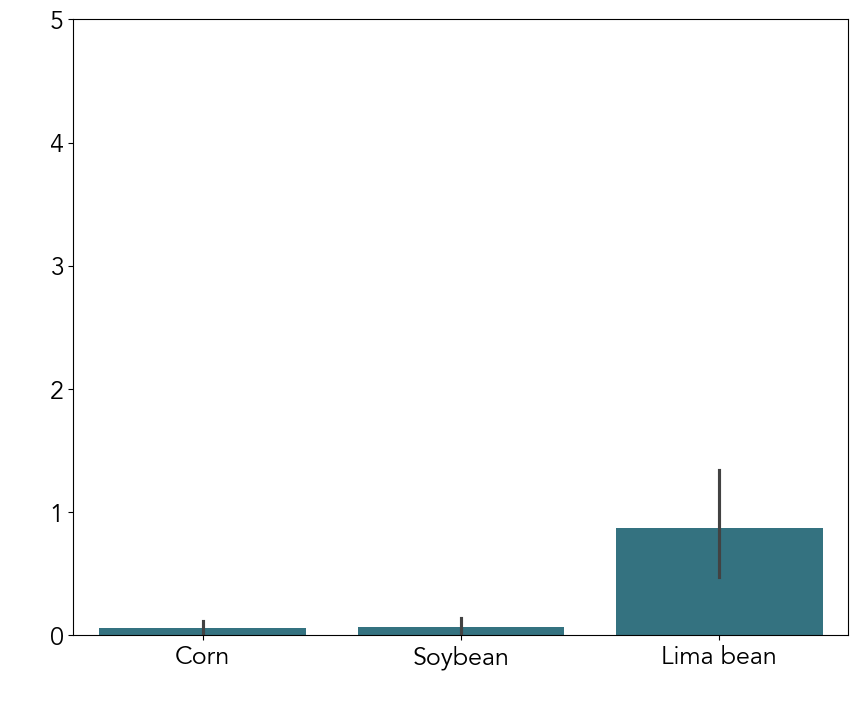

In [1013]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 18})

sns.barplot(
    data=wm, x="seed_type", y="total_scm",color="#287a8c",
    order=['Corn', 'Soybean', 'Lima bean']
)

plt.xlabel(' ', labelpad=10)
plt.ylabel(' ', labelpad=10)
#plt.xlabel('Seed type', labelpad=10)
#plt.ylabel('Mean $\it{D. platura}$ larvae and pupae', labelpad=10)
plt.ylim(0, 5)
#plt.title('$\it{D. platura}$ larvae in traps')
#plt.savefig('Figures/cover_crop.png')
plt.show()


In [1014]:
wm.groupby('seed_type').mean('total_scm')

,number_seeds,scm_larvae_sum,scm_pupae_sum,wireworms,scm_seeds,total_phorids,total_scm,Unnamed: 0,week,week_before,two_weeks_before,prop_seeds
seed_type,,,,,,,,,,,,
Corn,9.470588,0.050420,0.008403,0.061625,0.022409,0.086835,0.058824,1433.492891,18.417062,17.417062,16.417062,0.002298
Lima bean,8.852853,0.476471,0.397059,0.211765,0.129412,5.488235,0.873529,1438.838235,18.357843,17.357843,16.357843,0.016363
Soybean,9.308824,0.053922,0.014706,0.029412,0.029412,0.137931,0.068627,1435.357843,18.382353,17.382353,16.382353,0.003392


In [1077]:
wm.groupby('seed_type')['total_scm'].sem()

seed_type
Corn         0.027735
Lima bean    0.230984
Soybean      0.034412
Name: total_scm, dtype: float64

In [1079]:
wm.groupby('seed_type')['prop_seeds'].sem()

seed_type
Corn         0.001502
Lima bean    0.004195
Soybean      0.001787
Name: prop_seeds, dtype: float64

In [1015]:
group1 = wm.loc[wm['seed_type'] == 'Corn']['total_scm']
group2 = wm.loc[wm['seed_type'] == 'Soybean']['total_scm']
group3 = wm.loc[wm['seed_type'] == 'Lima bean']['total_scm']
statistic, p_value = stats.kruskal(group1, group2, group3)
print("Kruskal-Wallis H statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H statistic: 63.85777549840065
P-value: 1.3597536623493051e-14


In [1016]:
data = [group1, group2, group3]
p_values = sp.posthoc_dunn(data, p_adjust='holm')

print(p_values)

              1             2             3
1  1.000000e+00  8.065956e-01  6.058532e-13
2  8.065956e-01  1.000000e+00  3.001428e-09
3  6.058532e-13  3.001428e-09  1.000000e+00


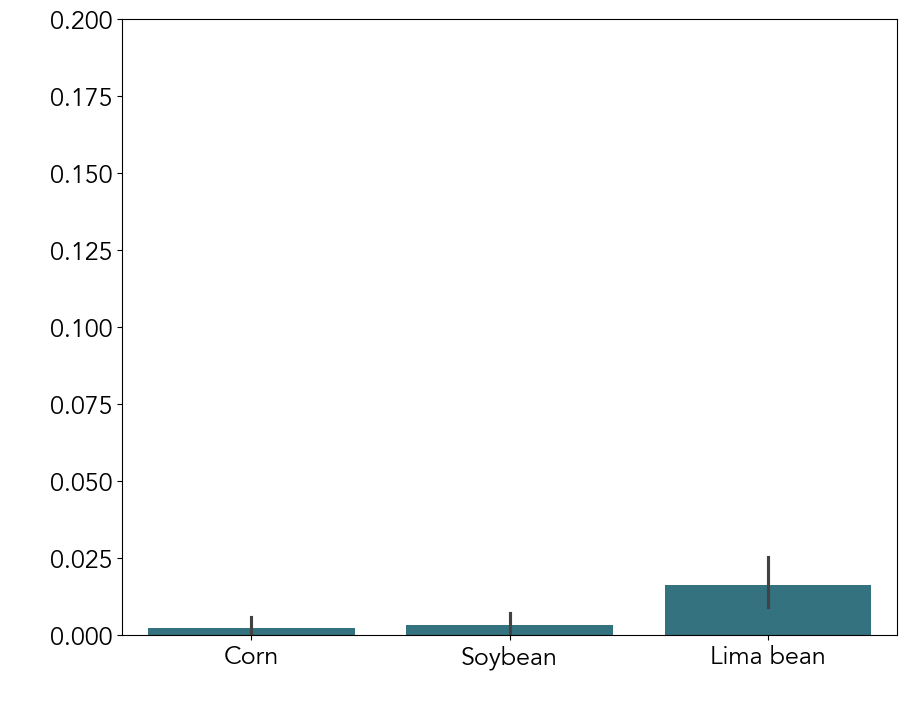

In [1017]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 18})

sns.barplot(
    data=wm.reset_index(), x="seed_type", y="prop_seeds",color="#287a8c",
    order=['Corn', 'Soybean', 'Lima bean']
)

plt.xlabel(' ', labelpad=10)
plt.ylabel(' ', labelpad=10)
#plt.xlabel('Seed type', labelpad=10)
#plt.ylabel('Proportion seeds damaged by $\it{D. platura}$', labelpad=10)
plt.ylim(0, 0.2)
#plt.title('$\it{D. platura}$ larvae in traps')
#plt.savefig('Figures/cover_crop.png')
plt.show()

In [1018]:
group1 = wm.loc[wm['seed_type'] == 'Corn']['prop_seeds'].dropna()
group2 = wm.loc[wm['seed_type'] == 'Soybean']['prop_seeds'].dropna()
group3 = wm.loc[wm['seed_type'] == 'Lima bean']['prop_seeds'].dropna()
statistic, p_value = stats.kruskal(group1, group2, group3)
print("Kruskal-Wallis H statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis H statistic: 26.27496269958437
P-value: 1.9699914609002246e-06


In [1019]:
data = [group1, group2, group3]
p_values = sp.posthoc_dunn(data, p_adjust='holm')

print(p_values)

          1         2         3
1  1.000000  0.610519  0.000004
2  0.610519  1.000000  0.000561
3  0.000004  0.000561  1.000000


# Sticky Card Data

In [1020]:
scm_2023 = pd.read_csv('../../2023/Data/2023_scm_counts.csv')
scm_2023 = clean_columns(scm_2023)
scm_2023['date'] = pd.to_datetime(scm_2023["date"], format="%m/%d/%y")
scm_2023[['n_scm_i_m', 'n_scm_o_m', 'n_scm_i_f', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']] = scm_2023[['n_scm_i_m', 'n_scm_o_m', 'n_scm_i_f', 'n_scm_o_f', 'n_d_florilega_i', 'n_d_florilega_o']].apply(pd.to_numeric, errors='coerce')
scm_2023['scm_male'] = scm_2023['n_scm_i_m'] + scm_2023['n_scm_o_m']
scm_2023['scm_female'] = scm_2023['n_scm_i_f'] + scm_2023['n_scm_o_f']
scm_2023['total_scm'] = scm_2023['n_scm_i_m'] + scm_2023['n_scm_o_m'] + scm_2023['n_scm_i_f'] + scm_2023['n_scm_o_f']
scm_2023 = scm_2023.dropna(subset=['total_scm'])
scm_2023['florilega'] = scm_2023['n_d_florilega_i'] + scm_2023['n_d_florilega_o']
scm_2023['total_flies'] = scm_2023['total_scm'] + scm_2023['florilega']
scm_2023 = scm_2023.sort_values('date')
scm_2023['season_total'] = scm_2023.groupby('site')['total_scm'].transform('sum')
scm_2023['male_total'] = scm_2023.groupby('site')['scm_male'].transform('sum')
scm_2023['female_total'] = scm_2023.groupby('site')['scm_female'].transform('sum')
scm_2023['weekly_prop'] = scm_2023['total_scm'] / scm_2023['season_total']
scm_2023['season_prop'] = scm_2023.groupby('site')['weekly_prop'].transform('cumsum')
scm_2023['weekly_prop_m'] = scm_2023['scm_male'] / scm_2023['male_total']
scm_2023['weekly_prop_f'] = scm_2023['scm_female'] / scm_2023['female_total']

scm_2023['season_male_prop'] = scm_2023.groupby('site')['weekly_prop_m'].transform('cumsum')
scm_2023['season_female_prop'] = scm_2023.groupby('site')['weekly_prop_f'].transform('cumsum')

scm_2023['week'] = scm_2023['date'].dt.isocalendar().week.astype(int)
scm_2023['year'] = scm_2023['date'].dt.isocalendar().year

scm_2023 = scm_2023[['card_id', 'site', 'date', 'total_scm', 'scm_male', 'scm_female', 'florilega', 'season_total', 
                    'male_total', 'female_total', 'weekly_prop', 'weekly_prop_f', 'weekly_prop_m', 'season_prop', 'total_flies', 'week', 'year']]
scm_2023 = scm_2023.rename(columns={"site": "field_id", "date": "date_collected"})
scm_2023

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36393/4255340750.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scm_2023['florilega'] = scm_2023['n_d_florilega_i'] + scm_2023['n_d_florilega_o']
/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36393/4255340750.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scm_2023['total_flies'] = scm_2023['total_scm'] + scm_2023['florilega']


,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop,total_flies,week,year
2376,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2371,2001,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2372,2002,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2375,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2374,2004,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,275.0,185.0,90.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,7352,WIS_COO,2023-12-04,2.0,1.0,1.0,0.0,1367.0,880.0,487.0,0.001463,0.002053,0.001136,1.000000,2.0,49,2023
7,7308,KAT_JEF,2023-12-05,1.0,0.0,1.0,0.0,109.0,62.0,47.0,0.009174,0.021277,0.000000,1.000000,1.0,49,2023
6,7399,DIP_CUR,2023-12-06,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.999235,0.0,49,2023
5,7400,DIP_CUR,2023-12-12,1.0,1.0,0.0,0.0,1308.0,655.0,653.0,0.000765,0.000000,0.001527,1.000000,1.0,50,2023


In [1021]:
scm_2024 = pd.read_csv('../Data/2024_scm_counts.csv')
scm_2024 = clean_columns(scm_2024)
scm_2024['date_collected'] = pd.to_datetime(scm_2024["date_collected"], format='mixed')
scm_2024['scm_male'] = scm_2024['n_scm_m_1'] + scm_2024['n_scm_m_2']
scm_2024['scm_female'] = scm_2024['n_scm_f_1'] + scm_2024['n_scm_f_2']
scm_2024['total_scm'] = scm_2024['n_scm_m_1'] + scm_2024['n_scm_m_2'] + scm_2024['n_scm_f_1'] + scm_2024['n_scm_f_2']
scm_2024['florilega'] = scm_2024['n_d_florilega_1'] + scm_2024['n_d_florilega_2']
scm_2024['total_flies'] = scm_2024['florilega'] + scm_2024['total_scm']
scm_2024 = scm_2024.dropna(subset=['total_scm'])
scm_2024 = scm_2024.sort_values('date_collected')

scm_2024['season_total'] = scm_2024.groupby('field_id')['total_scm'].transform('sum')
scm_2024['male_total'] = scm_2024.groupby('field_id')['scm_male'].transform('sum')
scm_2024['female_total'] = scm_2024.groupby('field_id')['scm_female'].transform('sum')
scm_2024['weekly_prop'] = scm_2024['total_scm'] / scm_2024['season_total']
scm_2024['season_prop'] = scm_2024.groupby('field_id')['weekly_prop'].transform('cumsum')
scm_2024['weekly_prop_m'] = scm_2024['scm_male'] / scm_2024['male_total']
scm_2024['weekly_prop_f'] = scm_2024['scm_female'] / scm_2024['female_total']

scm_2024['season_male_prop'] = scm_2024.groupby('field_id')['weekly_prop_m'].transform('cumsum')
scm_2024['season_female_prop'] = scm_2024.groupby('field_id')['weekly_prop_f'].transform('cumsum')

scm_2024['week'] = scm_2024['date_collected'].dt.isocalendar().week.astype(int)
scm_2024['year'] = scm_2024['date_collected'].dt.isocalendar().year

scm_2024 = scm_2024[['field_id', 'date_collected', 'total_scm', 'scm_male', 'scm_female', 'florilega', 'season_total', 
                    'male_total', 'female_total', 'weekly_prop', 'weekly_prop_f', 'weekly_prop_m', 'total_flies', 'week', 'year']]
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,total_flies,week,year
2097,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,0.001133,0.000000,1.0,2,2024
2096,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,3,2024
2095,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,4,2024
596,GAB_ALL,2024-03-08,1.0,1.0,0.0,0.0,220.0,169.0,51.0,0.004545,0.000000,0.005917,1.0,10,2024
618,GAB_HEN,2024-03-08,0.0,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,0.000000,0.000000,0.0,10,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,0.000000,0.000000,0.0,49,2024
406,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,0.000000,0.000000,0.0,49,2024
335,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,49,2024
483,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,0.000000,0.000000,0.0,49,2024


In [1022]:
sticky_cards_merged = pd.concat([scm_2023, scm_2024])
sticky_cards_merged['week'] = sticky_cards_merged['date_collected'].dt.isocalendar().week.astype(int)
sticky_cards_merged['year'] = sticky_cards_merged['date_collected'].dt.isocalendar().year

sticky_cards_merged.to_csv('sticky_cards_merged.csv')

sticky_cards_merged

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop,total_flies,week,year
2376,2006.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.0,0.0,0.0,0.0,0.0,11,2023
2371,2001.0,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.0,0.0,0.0,0.0,0.0,11,2023
2372,2002.0,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.0,0.0,0.0,0.0,0.0,11,2023
2375,2005.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.0,0.0,0.0,0.0,0.0,11,2023
2374,2004.0,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,275.0,185.0,90.0,0.0,0.0,0.0,0.0,0.0,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,NaN,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.0,0.0,0.0,NaN,0.0,49,2024
406,NaN,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.0,0.0,0.0,NaN,0.0,49,2024
335,NaN,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.0,0.0,0.0,NaN,0.0,49,2024
483,NaN,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.0,0.0,0.0,NaN,0.0,49,2024


(9.0, 52.0)

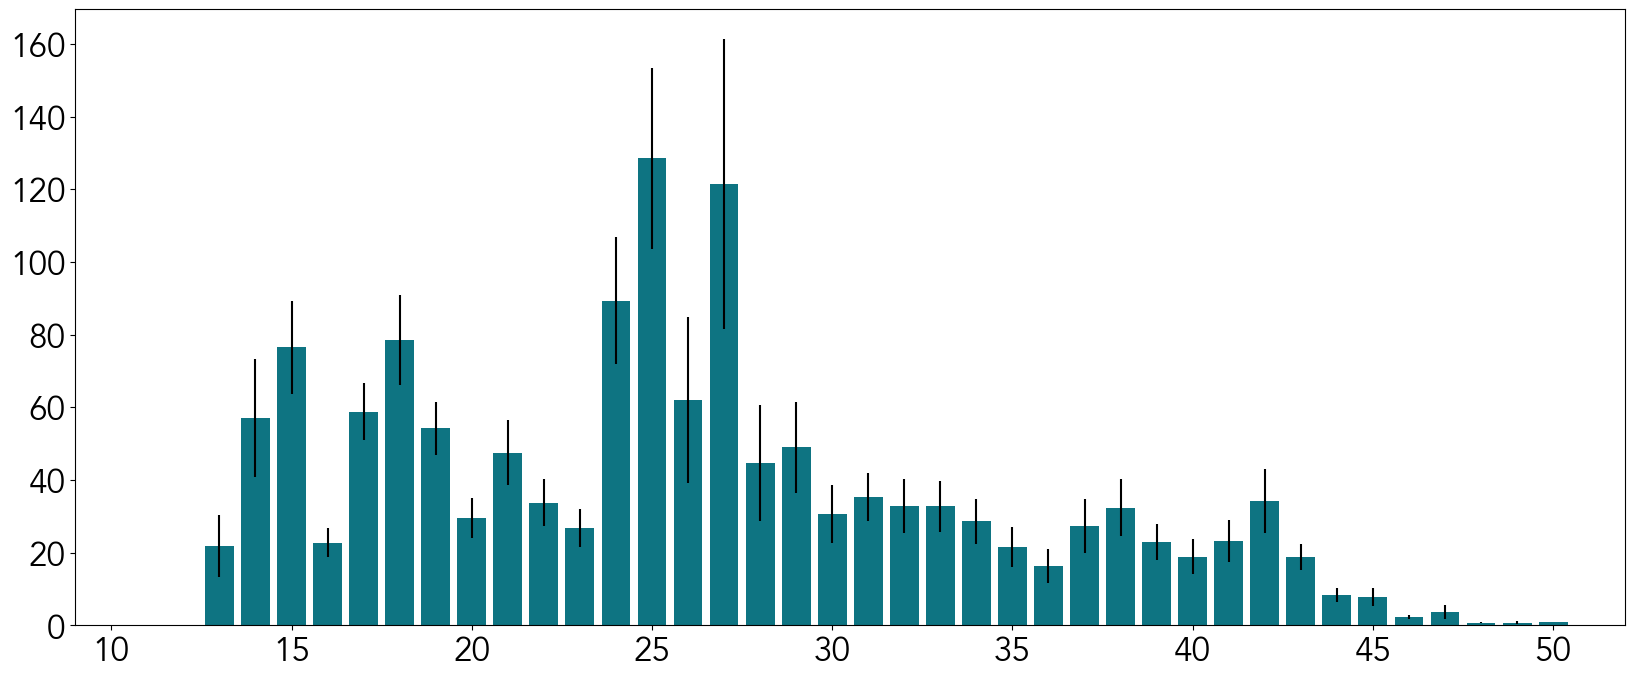

In [1023]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 24})

grouped_2023 = sticky_cards_merged.loc[sticky_cards_merged['year']==2023].groupby('week')['total_flies'].mean().reset_index()
se_2023 = sticky_cards_merged.loc[sticky_cards_merged['year']==2023].groupby('week')['total_flies'].sem().reset_index()

plt.bar(grouped_2023["week"], grouped_2023["total_flies"], color='#0e7482')
plt.errorbar(x=grouped_2023["week"], y=grouped_2023["total_flies"], yerr=se_2023['total_flies'], ecolor='black', fmt='None')
plt.xlim(9, 52)


(9.0, 52.0)

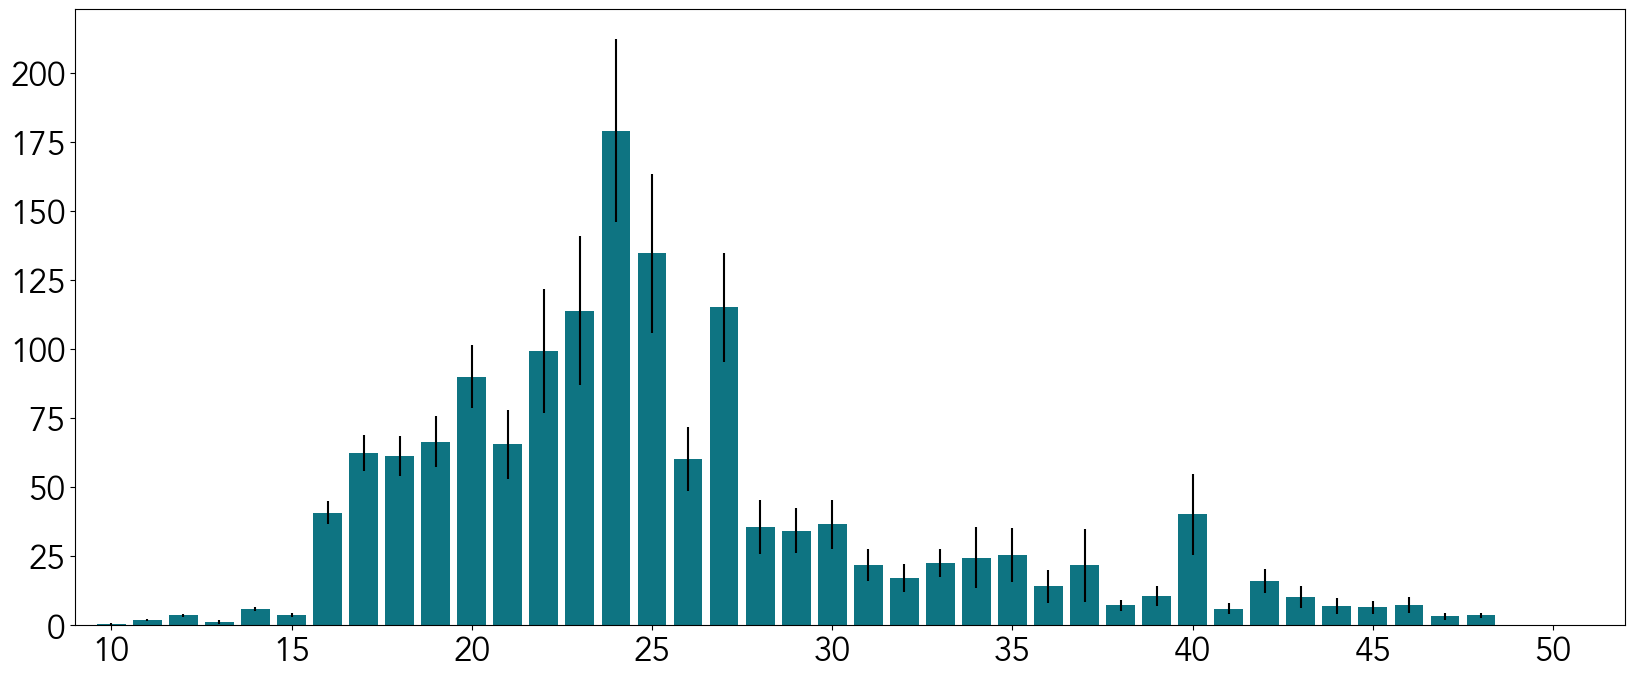

In [1024]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 24})


grouped_2024 = sticky_cards_merged.loc[sticky_cards_merged['year']==2024].groupby('week')['total_flies'].mean().reset_index()
se_2024 = sticky_cards_merged.loc[sticky_cards_merged['year']==2024].groupby('week')['total_flies'].sem().reset_index()

plt.bar(grouped_2024["week"], grouped_2024["total_flies"], color='#0e7482')
plt.errorbar(x=grouped_2024["week"], y=grouped_2024["total_flies"], yerr=se_2024['total_flies'], ecolor='black', fmt='None')
plt.xlim(9, 52)


In [1025]:
subset = sticky_cards_merged[['total_scm', 'scm_male', 'florilega']]
subset['total_flies'] = subset['total_scm'] + subset['florilega']
subset = subset.drop('total_scm', axis=1)
subset = subset.melt(id_vars=['total_flies'], var_name='species', value_name='species_count')
subset

/var/folders/vt/gz9c8wh17772k93xq1vtnl0c0000gn/T/ipykernel_36393/234621924.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['total_flies'] = subset['total_scm'] + subset['florilega']


,total_flies,species,species_count
0,0.0,scm_male,0.0
1,0.0,scm_male,0.0
2,0.0,scm_male,0.0
3,0.0,scm_male,0.0
4,0.0,scm_male,0.0
...,...,...,...
5277,0.0,florilega,0.0
5278,0.0,florilega,0.0
5279,0.0,florilega,0.0
5280,0.0,florilega,0.0


<Figure size 1600x800 with 0 Axes>

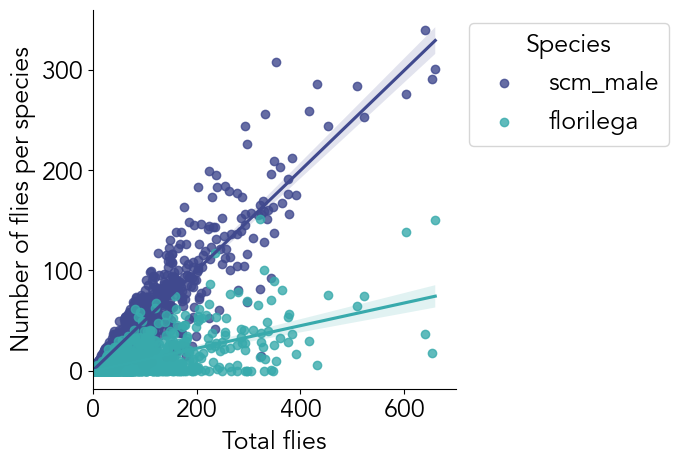

In [1026]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(16,8))
plt.rcParams.update({'font.size': 18})

ax = sns.lmplot(data=subset, x='total_flies', y='species_count', hue='species', fit_reg=True, legend=False, palette='mako')
plt.xlabel('Total flies')
plt.ylabel('Number of flies per species')
plt.xlim(0, 700)

plt.legend(title='Species', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Climate

In [1027]:
climate_2023 = pd.read_csv('../../2023/Data/2023_scm_climate.csv')
climate_2023["date"] = pd.to_datetime(climate_2023["date"], format="%m/%d/%y")
climate_2023["week"] = climate_2023["date"].dt.isocalendar().week
climate_2023 = (
    climate_2023[
        ["field_id", "week", "ppt_in", "tmin_f", "tmean_f", "tmax_f", 'tdmean_f', 'vpdmin_hPa', 'vpdmax_hPa']
    ]
    .groupby(["field_id", "week"])
    .mean()
)
climate_2023['year'] = 2023
climate_2023 = climate_2023.reset_index()
climate_2023

,field_id,week,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa,year
0,DEG_DIE_HILL,1,0.144286,33.014286,39.142857,45.214286,35.685714,0.241429,2.728571,2023
1,DEG_DIE_HILL,2,0.114286,22.571429,27.885714,33.185714,24.714286,0.288571,1.651429,2023
2,DEG_DIE_HILL,3,0.168571,24.700000,29.342857,33.971429,27.071429,0.171429,1.292857,2023
3,DEG_DIE_HILL,4,0.111429,24.385714,29.571429,34.742857,24.800000,0.218571,2.294286,2023
4,DEG_DIE_HILL,5,0.018571,5.085714,15.485714,25.900000,10.642857,0.175714,2.072857,2023
...,...,...,...,...,...,...,...,...,...,...
2907,ZUE_REE,48,0.058571,29.757143,35.542857,41.285714,27.985714,0.737143,3.732857,2023
2908,ZUE_REE,49,0.121429,32.971429,37.800000,42.642857,32.885714,0.515714,3.181429,2023
2909,ZUE_REE,50,0.041429,32.428571,38.342857,44.242857,28.114286,1.237143,4.510000,2023
2910,ZUE_REE,51,0.160000,27.271429,32.371429,37.442857,28.628571,0.358571,2.224286,2023


In [1028]:
climate_2024 = pd.read_csv('../../2024/Data/2024_scm_climate.csv')
climate_2024["date"] = pd.to_datetime(climate_2024["date"], format="%m/%d/%y")
climate_2024["week"] = climate_2024["date"].dt.isocalendar().week
climate_2024 = (
    climate_2024[
        ["field_id", "week", "ppt_in", "tmin_f", "tmean_f", "tmax_f", 'tdmean_f', 'vpdmin_hPa', 'vpdmax_hPa']
    ]
    .groupby(["field_id", "week"])
    .mean()
)
climate_2024['year'] = 2024
climate_2024 = climate_2024.reset_index()

dict = {'DEG_DIE_HILL': 'DEG_DIE_2', 'DEG_FOU_WOOD': 'DEG_FOU_2', 'DEG_PER_STRI': 'DEG_PER_2', 'DEG_VIL': 'DEG_VIL_2'
        }
climate_2024 = climate_2024.replace({'field_id': dict})


climate_2024

,field_id,week,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa,year
0,DEG_DIE_2,1,0.100000,25.822222,30.622222,35.455556,26.866667,0.253333,1.995556,2024
1,DEG_DIE_2,2,0.215714,28.842857,33.657143,38.471429,28.828571,0.174286,2.194286,2024
2,DEG_DIE_2,3,0.045714,8.271429,14.371429,20.471429,7.671429,0.300000,1.532857,2024
3,DEG_DIE_2,4,0.332857,25.000000,31.500000,37.971429,29.028571,0.091429,1.611429,2024
4,DEG_DIE_2,5,0.118571,27.171429,30.285714,33.414286,27.642857,0.270000,1.182857,2024
...,...,...,...,...,...,...,...,...,...,...
2283,ZUE_REE,48,0.138571,30.157143,35.671429,41.214286,28.685714,0.540000,3.565714,2024
2284,ZUE_REE,49,0.011429,25.328571,29.442857,33.585714,21.128571,0.654286,2.887143,2024
2285,ZUE_REE,50,0.121429,26.757143,32.614286,38.471429,25.714286,0.544286,2.641429,2024
2286,ZUE_REE,51,0.112857,26.214286,30.842857,35.471429,26.114286,0.620000,2.128571,2024


In [1029]:
overwintering_sites = [
    "EVE_ORC_IN",
    "EVE_ORC_OUT",
    "EVE_FIE_IN",
    "EVE_FIE_OUT",
    "EVE_FOR_IN",
    "EVE_FOR_OUT",
    "KIR_FOR_IN",
    "KIR_FOR_OUT",
    "KIR_ORC_IN",
    "KIR_ORC_OUT",
    'KIR_FIE_IN',
    'KIR_FIE_OUT',
    'GRS_FIE_IN',
    'GRS_FIE_OUT',
    'GRS_ORC_OUT',
    'GRS_ORC_IN',
    'GRN_FIE_IN',
    'GRN_FIE_OUT',
    'GRN_ORC_OUT',
    'GRN_ORC_IN',
    'DUN_FIE_IN',
    'DUN_FOR_IN',
    'DUN_FOR_OUT',
    'IND_ORC_IN',
    'IND_ORC_OUT',
    'IND_ORC_IN_2',
    'IND_ORC_OUT_2',
    'OLE_FOR_OUT',
    'OLE_FOR_IN',
    'OLE_FIE_OUT',
    'OLE_FIE_IN',
    'CUR_FIE_IN',
    'FLE_FIE_IN', 
    'FLE_FOR_IN',
    'FLE_FOR_OUT',
    'PAT_FIE_IN'
]

In [1030]:
scm_2023 = scm_2023[~scm_2023['field_id'].isin(overwintering_sites)]
scm_2023 = scm_2023.replace({'SMI_JOH ': 'SMI_JOH'})
scm_2023 = scm_2023[scm_2023.field_id != 'ZUE_FLE']
scm_2023

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,season_prop,total_flies,week,year
2376,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2371,2001,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2372,2002,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2375,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
2374,2004,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,275.0,185.0,90.0,0.000000,0.000000,0.000000,0.000000,0.0,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,7352,WIS_COO,2023-12-04,2.0,1.0,1.0,0.0,1367.0,880.0,487.0,0.001463,0.002053,0.001136,1.000000,2.0,49,2023
7,7308,KAT_JEF,2023-12-05,1.0,0.0,1.0,0.0,109.0,62.0,47.0,0.009174,0.021277,0.000000,1.000000,1.0,49,2023
6,7399,DIP_CUR,2023-12-06,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,0.000000,0.000000,0.000000,0.999235,0.0,49,2023
5,7400,DIP_CUR,2023-12-12,1.0,1.0,0.0,0.0,1308.0,655.0,653.0,0.000765,0.000000,0.001527,1.000000,1.0,50,2023


In [1031]:
scm_2024 = scm_2024[~scm_2024['field_id'].isin(overwintering_sites)]
scm_2024 = scm_2024.replace({'SMI_JOH ': 'SMI_JOH'})
scm_2024 = scm_2024[scm_2024.field_id != 'ZUE_FLE']
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,total_flies,week,year
2097,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,0.001133,0.000000,1.0,2,2024
2096,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,3,2024
2095,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,4,2024
596,GAB_ALL,2024-03-08,1.0,1.0,0.0,0.0,220.0,169.0,51.0,0.004545,0.000000,0.005917,1.0,10,2024
618,GAB_HEN,2024-03-08,0.0,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,0.000000,0.000000,0.0,10,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,0.000000,0.000000,0.0,49,2024
406,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,0.000000,0.000000,0.0,49,2024
335,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,49,2024
483,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,0.000000,0.000000,0.0,49,2024


In [1032]:
dict = {'DEG_PER_STRI': 'DEG_PER_STRIP', 'DEG_YOU_BOCE': 'DEG_YOU_BOCES', 'DEG_YOU_JONE': 'DEG_YOU_JONES', 'DEG_YOU_OSHE': 'DEG_YOU_OSHEA'
        }
climate_2023 = climate_2023.replace({'field_id': dict})
climate_2024 = climate_2024.replace({'field_id': dict})

In [1033]:
scm_2023 = scm_2023.merge(climate_2023, on=['field_id', 'week', 'year'])
scm_2023

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,total_flies,week,year,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa
0,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.0,11,2023,0.148571,24.857143,32.085714,39.342857,24.514286,0.400000,3.751429
1,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.0,11,2023,0.148571,24.857143,32.085714,39.342857,24.514286,0.400000,3.751429
2,2001,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,...,0.0,11,2023,0.145714,19.157143,28.414286,37.714286,21.157143,0.604286,3.735714
3,2002,DIP_CUR,2023-03-13,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,...,0.0,11,2023,0.145714,19.157143,28.414286,37.714286,21.157143,0.604286,3.735714
4,2004,POV_DUN,2023-03-13,0.0,0.0,0.0,0.0,275.0,185.0,90.0,...,0.0,11,2023,0.154286,21.728571,30.500000,39.314286,23.100000,0.395714,3.991429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,7352,WIS_COO,2023-12-04,2.0,1.0,1.0,0.0,1367.0,880.0,487.0,...,2.0,49,2023,0.091429,28.457143,34.671429,40.957143,30.514286,0.328571,2.665714
827,7308,KAT_JEF,2023-12-05,1.0,0.0,1.0,0.0,109.0,62.0,47.0,...,1.0,49,2023,0.170000,30.757143,37.400000,44.000000,32.585714,0.204286,3.987143
828,7399,DIP_CUR,2023-12-06,0.0,0.0,0.0,0.0,1308.0,655.0,653.0,...,0.0,49,2023,0.178571,31.642857,36.314286,40.971429,29.871429,0.674286,3.160000
829,7400,DIP_CUR,2023-12-12,1.0,1.0,0.0,0.0,1308.0,655.0,653.0,...,1.0,50,2023,0.147143,25.300000,33.485714,41.671429,25.357143,0.592857,3.898571


In [1034]:
#dict = {'SMI_COB_3': 'SMI_COB', 'KAT_TEE_3': 'KAT_TEE_2'}
#climate_2024 = climate_2024.replace({'field_id': dict})

In [1035]:
dict = {'DEG_DIE_HILL': 'DEG_DIE_2', 'DEG_FOU_WOOD': 'DEG_FOU_2', 'DEG_PER_STRIP': 'DEG_PER_2', 'DEG_VIL': 'DEG_VIL_2', 
        'KAT_TEE_2': 'KAT_TEE_3', 'SMI_COB': 'SMI_COB_3'
        }
scm_2024 = scm_2024.replace({'field_id': dict})
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,weekly_prop_f,weekly_prop_m,total_flies,week,year
2097,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,0.001133,0.000000,1.0,2,2024
2096,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,3,2024
2095,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,4,2024
596,GAB_ALL,2024-03-08,1.0,1.0,0.0,0.0,220.0,169.0,51.0,0.004545,0.000000,0.005917,1.0,10,2024
618,GAB_HEN,2024-03-08,0.0,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,0.000000,0.000000,0.0,10,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,0.000000,0.000000,0.0,49,2024
406,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,0.000000,0.000000,0.0,49,2024
335,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,0.000000,0.000000,0.0,49,2024
483,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,0.000000,0.000000,0.0,49,2024


In [1036]:
scm_2024 = scm_2024.merge(climate_2024, on=['field_id', 'week', 'year'])
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,...,total_flies,week,year,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa
0,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,...,1.0,2,2024,0.178571,28.071429,33.657143,39.228571,26.014286,0.592857,2.968571
1,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,3,2024,0.042857,7.000000,13.800000,20.614286,4.642857,0.542857,1.685714
2,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,4,2024,0.275714,25.071429,31.757143,38.442857,26.614286,0.524286,2.110000
3,GAB_ALL,2024-03-08,1.0,1.0,0.0,0.0,220.0,169.0,51.0,0.004545,...,1.0,10,2024,0.528571,35.714286,43.100000,50.485714,38.042857,0.125714,4.438571
4,GAB_HEN,2024-03-08,0.0,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,...,0.0,10,2024,0.507143,35.385714,42.685714,49.985714,37.500000,0.142857,4.354286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,...,0.0,49,2024,0.041429,21.614286,26.785714,32.014286,19.628571,0.445714,2.778571
893,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,...,0.0,49,2024,0.035714,23.442857,27.728571,32.085714,20.900000,0.460000,2.552857
894,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,49,2024,0.067143,20.171429,25.371429,30.542857,17.471429,0.665714,2.668571
895,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,...,0.0,49,2024,0.044286,25.542857,30.271429,34.985714,22.157143,0.480000,3.115714


In [919]:
#sticky_cards_merged = sticky_cards_merged[~sticky_cards_merged['field_id'].isin(overwintering_sites)]
#sticky_cards_merged = sticky_cards_merged.replace({'SMI_JOH ': 'SMI_JOH'})
#sticky_cards_merged = sticky_cards_merged[sticky_cards_merged.field_id != 'ZUE_FLE']
#sticky_cards_merged

# Landscape

In [1037]:
cdl_2022_500m_2023_sites = pd.read_csv('../../2023/Landscape/2022_ny_cdl/2022_ny_cdl_csv/2023_scm_2022_cdl_500m.csv')
cdl_2022_500m_2023_sites = cdl_2022_500m_2023_sites.drop('Unnamed: 0', axis=1)
cdl_2022_500m_2023_sites = cdl_2022_500m_2023_sites[['Name', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2022_500m_2023_sites['Prop Corn'] = (cdl_2022_500m_2023_sites['Corn'] + cdl_2022_500m_2023_sites['Sweet Corn']) / cdl_2022_500m_2023_sites['Total']
cdl_2022_500m_2023_sites['Prop Ag'] = cdl_2022_500m_2023_sites['Ag'] / cdl_2022_500m_2023_sites['Total']
cdl_2022_500m_2023_sites['Prop Nat'] = cdl_2022_500m_2023_sites['Nat'] / cdl_2022_500m_2023_sites['Total']
cdl_2022_500m_2023_sites = cdl_2022_500m_2023_sites.add_suffix('_PreviousYear_500m')
cdl_2022_500m_2023_sites = clean_columns(cdl_2022_500m_2023_sites)
cdl_2022_500m_2023_sites = cdl_2022_500m_2023_sites.rename(columns={'name_previous_year_500m': 'field_id'})
cdl_2022_500m_2023_sites.head()

,field_id,corn_previous_year_500m,sweet_corn_previous_year_500m,ag_previous_year_500m,nat_previous_year_500m,total_previous_year_500m,prop_corn_previous_year_500m,prop_ag_previous_year_500m,prop_nat_previous_year_500m
0,POV_DUN,11,0,171,753,1588,0.006927,0.107683,0.474181
1,DIP_FLE,706,0,931,305,1603,0.440424,0.580786,0.190268
2,DIP_CUR,540,0,978,212,1593,0.338983,0.613936,0.133082
3,GAB_STE,252,0,408,914,1627,0.154886,0.250768,0.561770
4,SMI_CRO,712,0,1347,29,1611,0.441962,0.836127,0.018001


In [1038]:
cdl_2022_1000m_2023_sites = pd.read_csv('../../2023/Landscape/2022_ny_cdl/2022_ny_cdl_csv/2023_scm_2022_cdl_1000m.csv')
cdl_2022_1000m_2023_sites = cdl_2022_1000m_2023_sites.drop('Unnamed: 0', axis=1)
cdl_2022_1000m_2023_sites = cdl_2022_1000m_2023_sites[['Name', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2022_1000m_2023_sites['Prop Corn'] = (cdl_2022_1000m_2023_sites['Corn'] + cdl_2022_1000m_2023_sites['Sweet Corn']) / cdl_2022_1000m_2023_sites['Total']
cdl_2022_1000m_2023_sites['Prop Ag'] = cdl_2022_1000m_2023_sites['Ag'] / cdl_2022_1000m_2023_sites['Total']
cdl_2022_1000m_2023_sites['Prop Nat'] = cdl_2022_1000m_2023_sites['Nat'] / cdl_2022_1000m_2023_sites['Total']
cdl_2022_1000m_2023_sites = cdl_2022_1000m_2023_sites.add_suffix('_PreviousYear_1000m')
cdl_2022_1000m_2023_sites = clean_columns(cdl_2022_1000m_2023_sites)
cdl_2022_1000m_2023_sites = cdl_2022_1000m_2023_sites.rename(columns={'name_previous_year_1000m': 'field_id'})
cdl_2022_1000m_2023_sites.head()

,field_id,corn_previous_year_1000m,sweet_corn_previous_year_1000m,ag_previous_year_1000m,nat_previous_year_1000m,total_previous_year_1000m,prop_corn_previous_year_1000m,prop_ag_previous_year_1000m,prop_nat_previous_year_1000m
0,POV_DUN,17,0,744,3104,6362,0.002672,0.116944,0.487897
1,DIP_FLE,1985,30,4466,921,6399,0.314893,0.697922,0.143929
2,DIP_CUR,2231,0,3908,1079,6369,0.350290,0.613597,0.169414
3,GAB_STE,665,0,1429,4110,6499,0.102323,0.219880,0.632405
4,SMI_CRO,1395,0,4520,651,6454,0.216145,0.700341,0.100868


In [1039]:
cdl_2023_500m_2023_sites = pd.read_csv('../../2023/Landscape/2023_ny_cdl/2023_scm_2023_cdl_500m.csv')
cdl_2023_500m_2023_sites = cdl_2023_500m_2023_sites.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
cdl_2023_500m_2023_sites = cdl_2023_500m_2023_sites[['Name', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2023_500m_2023_sites['Prop Corn'] = (cdl_2023_500m_2023_sites['Corn'] + cdl_2023_500m_2023_sites['Sweet Corn']) / cdl_2023_500m_2023_sites['Total']
cdl_2023_500m_2023_sites['Prop Ag'] = cdl_2023_500m_2023_sites['Ag'] / cdl_2023_500m_2023_sites['Total']
cdl_2023_500m_2023_sites['Prop Nat'] = cdl_2023_500m_2023_sites['Nat'] / cdl_2023_500m_2023_sites['Total']
cdl_2023_500m_2023_sites = cdl_2023_500m_2023_sites.add_suffix('_CurrentYear_500m')
cdl_2023_500m_2023_sites = clean_columns(cdl_2023_500m_2023_sites)
cdl_2023_500m_2023_sites = cdl_2023_500m_2023_sites.rename(columns={'name_current_year_500m': 'field_id'})
cdl_2023_500m_2023_sites.head()

,field_id,corn_current_year_500m,sweet_corn_current_year_500m,ag_current_year_500m,nat_current_year_500m,total_current_year_500m,prop_corn_current_year_500m,prop_ag_current_year_500m,prop_nat_current_year_500m
0,POV_DUN,2,0,8,389,3888,0.000514,0.002058,0.100051
1,DIP_FLE,373,0,457,157,4013,0.092948,0.113880,0.039123
2,DIP_CUR,311,0,444,111,3906,0.079621,0.113671,0.028418
3,GAB_STE,107,0,179,459,4057,0.026374,0.044121,0.113138
4,SMI_CRO,334,0,650,19,3999,0.083521,0.162541,0.004751


In [1040]:
cdl_2023_1000m_2023_sites = pd.read_csv('../../2023/Landscape/2023_ny_cdl/2023_scm_2023_cdl_1000m.csv')
cdl_2023_1000m_2023_sites = cdl_2023_1000m_2023_sites.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2'], axis=1)
cdl_2023_1000m_2023_sites = cdl_2023_1000m_2023_sites[['Name', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2023_1000m_2023_sites['Prop Corn'] = (cdl_2023_1000m_2023_sites['Corn'] + cdl_2023_1000m_2023_sites['Sweet Corn']) / cdl_2023_1000m_2023_sites['Total']
cdl_2023_1000m_2023_sites['Prop Ag'] = cdl_2023_1000m_2023_sites['Ag'] / cdl_2023_1000m_2023_sites['Total']
cdl_2023_1000m_2023_sites['Prop Nat'] = cdl_2023_1000m_2023_sites['Nat'] / cdl_2023_1000m_2023_sites['Total']
cdl_2023_1000m_2023_sites = cdl_2023_1000m_2023_sites.add_suffix('_CurrentYear_1000m')
cdl_2023_1000m_2023_sites = clean_columns(cdl_2023_1000m_2023_sites)
cdl_2023_1000m_2023_sites = cdl_2023_1000m_2023_sites.rename(columns={'name_current_year_1000m': 'field_id'})
cdl_2023_1000m_2023_sites.head()

,field_id,corn_current_year_1000m,sweet_corn_current_year_1000m,ag_current_year_1000m,nat_current_year_1000m,total_current_year_1000m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m
0,POV_DUN,9,0,102,1539,12836.0,0.000701,0.007946,0.119897
1,DIP_FLE,969,5,1947,469,12884.0,0.075598,0.151118,0.036402
2,DIP_CUR,991,0,1764,527,12852.0,0.077109,0.137255,0.041005
3,GAB_STE,289,1,607,2063,12984.0,0.022335,0.046750,0.158888
4,SMI_CRO,577,0,1458,327,12944.0,0.044577,0.112639,0.025263


In [1041]:
cdl_2023_500m_2024_sites = pd.read_csv('../../2024/Landscape/2024_ny_cdl/2024_scm_2023_cdl_500m.csv')
cdl_2023_500m_2024_sites = cdl_2023_500m_2024_sites.drop(['Unnamed: 0', 'Latitude', 'Longitude'], axis=1)
cdl_2023_500m_2024_sites = cdl_2023_500m_2024_sites[['Field ID', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2023_500m_2024_sites['Prop Corn'] = (cdl_2023_500m_2024_sites['Corn'] + cdl_2023_500m_2024_sites['Sweet Corn']) / cdl_2023_500m_2024_sites['Total']
cdl_2023_500m_2024_sites['Prop Ag'] = cdl_2023_500m_2024_sites['Ag'] / cdl_2023_500m_2024_sites['Total']
cdl_2023_500m_2024_sites['Prop Nat'] = cdl_2023_500m_2024_sites['Nat'] / cdl_2023_500m_2024_sites['Total']
cdl_2023_500m_2024_sites = cdl_2023_500m_2024_sites.add_suffix('_PreviousYear_500m')
cdl_2023_500m_2024_sites = clean_columns(cdl_2023_500m_2024_sites)
cdl_2023_500m_2024_sites = cdl_2023_500m_2024_sites.rename(columns={'field_id_previous_year_500m': 'field_id'})
cdl_2023_500m_2024_sites.head()

,field_id,corn_previous_year_500m,sweet_corn_previous_year_500m,ag_previous_year_500m,nat_previous_year_500m,total_previous_year_500m,prop_corn_previous_year_500m,prop_ag_previous_year_500m,prop_nat_previous_year_500m
0,DEG_DIE_HILL,297,0,483,36,775.454730,0.383001,0.622860,0.046424
1,DEG_FOU_WOOD,338,0,409,25,770.295940,0.438792,0.530965,0.032455
2,DEG_PER_STRIP,192,0,463,92,771.444280,0.248884,0.600173,0.119257
3,DEG_VIL,446,4,485,78,772.520330,0.582509,0.627815,0.100968
4,DIP_CUR,311,0,444,111,766.188855,0.405905,0.579492,0.144873


In [1042]:
cdl_2023_1000m_2024_sites = pd.read_csv('../../2024/Landscape/2024_ny_cdl/2024_scm_2023_cdl_1000m.csv')
cdl_2023_1000m_2024_sites = cdl_2023_1000m_2024_sites.drop(['Unnamed: 0', 'Latitude', 'Longitude'], axis=1)
cdl_2023_1000m_2024_sites = cdl_2023_1000m_2024_sites[['Field ID', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2023_1000m_2024_sites['Prop Corn'] = (cdl_2023_1000m_2024_sites['Corn'] + cdl_2023_1000m_2024_sites['Sweet Corn']) / cdl_2023_1000m_2024_sites['Total']
cdl_2023_1000m_2024_sites['Prop Ag'] = cdl_2023_1000m_2024_sites['Ag'] / cdl_2023_1000m_2024_sites['Total']
cdl_2023_1000m_2024_sites['Prop Nat'] = cdl_2023_1000m_2024_sites['Nat'] / cdl_2023_1000m_2024_sites['Total']
cdl_2023_1000m_2024_sites = cdl_2023_1000m_2024_sites.add_suffix('_PreviousYear_1000m')
cdl_2023_1000m_2024_sites = clean_columns(cdl_2023_1000m_2024_sites)
cdl_2023_1000m_2024_sites = cdl_2023_1000m_2024_sites.rename(columns={'field_id_previous_year_1000m': 'field_id'})
cdl_2023_1000m_2024_sites.head()

,field_id,corn_previous_year_1000m,sweet_corn_previous_year_1000m,ag_previous_year_1000m,nat_previous_year_1000m,total_previous_year_1000m,prop_corn_previous_year_1000m,prop_ag_previous_year_1000m,prop_nat_previous_year_1000m
0,DEG_DIE_HILL,481,1,1003,633,3186.454730,0.151265,0.314770,0.198653
1,DEG_FOU_WOOD,991,0,1335,615,3194.295940,0.310241,0.417932,0.192531
2,DEG_PER_STRIP,708,0,1319,1033,3193.444280,0.221704,0.413034,0.323475
3,DEG_VIL,994,4,1394,679,3192.520330,0.312606,0.436646,0.212685
4,DIP_CUR,991,0,1764,527,3177.188855,0.311911,0.555208,0.165870


In [1043]:
cdl_2024_500m_2024_sites = pd.read_csv('../../2024/Landscape/2024_ny_cdl/2024_scm_2024_cdl_500m.csv')
cdl_2024_500m_2024_sites = cdl_2024_500m_2024_sites.drop(['Unnamed: 0', 'Latitude', 'Longitude'], axis=1)
cdl_2024_500m_2024_sites = cdl_2024_500m_2024_sites[['Field ID', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2024_500m_2024_sites['Prop Corn'] = (cdl_2024_500m_2024_sites['Corn'] + cdl_2024_500m_2024_sites['Sweet Corn']) / cdl_2024_500m_2024_sites['Total']
cdl_2024_500m_2024_sites['Prop Ag'] = cdl_2024_500m_2024_sites['Ag'] / cdl_2024_500m_2024_sites['Total']
cdl_2024_500m_2024_sites['Prop Nat'] = cdl_2024_500m_2024_sites['Nat'] / cdl_2024_500m_2024_sites['Total']
cdl_2024_500m_2024_sites = cdl_2024_500m_2024_sites.add_suffix('_CurrentYear_500m')
cdl_2024_500m_2024_sites = clean_columns(cdl_2024_500m_2024_sites)
cdl_2024_500m_2024_sites = cdl_2024_500m_2024_sites.rename(columns={'field_id_current_year_500m': 'field_id'})
cdl_2024_500m_2024_sites.head()

,field_id,corn_current_year_500m,sweet_corn_current_year_500m,ag_current_year_500m,nat_current_year_500m,total_current_year_500m,prop_corn_current_year_500m,prop_ag_current_year_500m,prop_nat_current_year_500m
0,DEG_DIE_HILL,163,0,499,44,831.454730,0.196042,0.600153,0.052919
1,DEG_FOU_WOOD,294,0,391,53,832.295940,0.353240,0.469785,0.063679
2,DEG_PER_STRIP,148,0,391,110,835.444280,0.177151,0.468014,0.131666
3,DEG_VIL,471,4,516,141,832.520330,0.570557,0.619805,0.169365
4,DIP_CUR,95,1,279,151,831.188855,0.115497,0.335664,0.181667


In [1044]:
cdl_2024_1000m_2024_sites = pd.read_csv('../../2024/Landscape/2024_ny_cdl/2024_scm_2024_cdl_1000m.csv')
cdl_2024_1000m_2024_sites = cdl_2024_1000m_2024_sites.drop(['Unnamed: 0', 'Latitude', 'Longitude'], axis=1)
cdl_2024_1000m_2024_sites = cdl_2024_1000m_2024_sites[['Field ID', 'Corn', 'Sweet Corn', 'Ag', 'Nat', 'Total']]
cdl_2024_1000m_2024_sites['Prop Corn'] = (cdl_2024_1000m_2024_sites['Corn'] + cdl_2024_1000m_2024_sites['Sweet Corn']) / cdl_2024_1000m_2024_sites['Total']
cdl_2024_1000m_2024_sites['Prop Ag'] = cdl_2024_1000m_2024_sites['Ag'] / cdl_2024_1000m_2024_sites['Total']
cdl_2024_1000m_2024_sites['Prop Nat'] = cdl_2024_1000m_2024_sites['Nat'] / cdl_2024_1000m_2024_sites['Total']
cdl_2024_1000m_2024_sites = cdl_2024_1000m_2024_sites.add_suffix('_CurrentYear_1000m')
cdl_2024_1000m_2024_sites = clean_columns(cdl_2024_1000m_2024_sites)
cdl_2024_1000m_2024_sites = cdl_2024_1000m_2024_sites.rename(columns={'field_id_current_year_1000m': 'field_id'})
cdl_2024_1000m_2024_sites.head()

,field_id,corn_current_year_1000m,sweet_corn_current_year_1000m,ag_current_year_1000m,nat_current_year_1000m,total_current_year_1000m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m
0,DEG_DIE_HILL,574,2,990,719,3431.454730,0.167859,0.288507,0.209532
1,DEG_FOU_WOOD,848,0,1177,727,3426.295940,0.247498,0.343520,0.212182
2,DEG_PER_STRIP,811,0,1270,1193,3433.444280,0.236206,0.369891,0.347464
3,DEG_VIL,952,4,1319,899,3430.520330,0.278675,0.384490,0.262059
4,DIP_CUR,833,1,1678,707,3430.188855,0.243135,0.489186,0.206111


In [1045]:
scm_2023 = scm_2023.merge(cdl_2022_500m_2023_sites, on='field_id')
scm_2023 = scm_2023.merge(cdl_2022_1000m_2023_sites, on='field_id')
scm_2023 = scm_2023.merge(cdl_2023_500m_2023_sites, on='field_id')
scm_2023 = scm_2023.merge(cdl_2023_1000m_2023_sites, on='field_id')
scm_2023 = scm_2023.drop(['corn_previous_year_500m',
       'sweet_corn_previous_year_500m', 'ag_previous_year_500m',
       'nat_previous_year_500m', 'total_previous_year_500m','corn_previous_year_1000m',
       'sweet_corn_previous_year_1000m', 'ag_previous_year_1000m',
       'nat_previous_year_1000m', 'total_previous_year_1000m','corn_current_year_500m',
       'sweet_corn_current_year_500m', 'ag_current_year_500m',
       'nat_current_year_500m', 'total_current_year_500m','corn_current_year_1000m',
       'sweet_corn_current_year_1000m', 'ag_current_year_1000m',
       'nat_current_year_1000m', 'total_current_year_1000m'], axis=1)
scm_2023

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_nat_previous_year_500m,prop_corn_previous_year_1000m,prop_ag_previous_year_1000m,prop_nat_previous_year_1000m,prop_corn_current_year_500m,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m
0,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.190268,0.314893,0.697922,0.143929,0.092948,0.113880,0.039123,0.075598,0.151118,0.036402
1,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.190268,0.314893,0.697922,0.143929,0.092948,0.113880,0.039123,0.075598,0.151118,0.036402
2,2008,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.190268,0.314893,0.697922,0.143929,0.092948,0.113880,0.039123,0.075598,0.151118,0.036402
3,2007,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.190268,0.314893,0.697922,0.143929,0.092948,0.113880,0.039123,0.075598,0.151118,0.036402
4,2013,DIP_FLE,2023-03-28,23.0,14.0,9.0,0.0,1556.0,780.0,776.0,...,0.190268,0.314893,0.697922,0.143929,0.092948,0.113880,0.039123,0.075598,0.151118,0.036402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,6682,ONE_STA,2023-07-26,40.0,19.0,21.0,4.0,1683.0,826.0,857.0,...,0.089327,0.525000,0.571221,0.254360,0.145636,0.155129,0.014587,0.126770,0.136136,0.059587
827,6683,ONE_STA,2023-08-01,22.0,15.0,7.0,3.0,1683.0,826.0,857.0,...,0.089327,0.525000,0.571221,0.254360,0.145636,0.155129,0.014587,0.126770,0.136136,0.059587
828,6684,ONE_STA,2023-08-08,51.0,28.0,23.0,3.0,1683.0,826.0,857.0,...,0.089327,0.525000,0.571221,0.254360,0.145636,0.155129,0.014587,0.126770,0.136136,0.059587
829,6686,ONE_STA,2023-08-14,54.0,15.0,39.0,5.0,1683.0,826.0,857.0,...,0.089327,0.525000,0.571221,0.254360,0.145636,0.155129,0.014587,0.126770,0.136136,0.059587


In [1046]:
dict = {'DEG_DIE_2': 'DEG_DIE_HILL', 'DEG_FOU_2': 'DEG_FOU_WOOD', 'DEG_PER_2': 'DEG_PER_STRIP', 'DEG_VIL_2': 'DEG_VIL', 
        'KAT_TEE_2': 'KAT_TEE_3', 'SMI_COB': 'SMI_COB_3'
        }
scm_2024 = scm_2024.replace({'field_id': dict})
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,...,total_flies,week,year,ppt_in,tmin_f,tmean_f,tmax_f,tdmean_f,vpdmin_hPa,vpdmax_hPa
0,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,...,1.0,2,2024,0.178571,28.071429,33.657143,39.228571,26.014286,0.592857,2.968571
1,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,3,2024,0.042857,7.000000,13.800000,20.614286,4.642857,0.542857,1.685714
2,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,4,2024,0.275714,25.071429,31.757143,38.442857,26.614286,0.524286,2.110000
3,GAB_ALL,2024-03-08,1.0,1.0,0.0,0.0,220.0,169.0,51.0,0.004545,...,1.0,10,2024,0.528571,35.714286,43.100000,50.485714,38.042857,0.125714,4.438571
4,GAB_HEN,2024-03-08,0.0,0.0,0.0,0.0,121.0,77.0,44.0,0.000000,...,0.0,10,2024,0.507143,35.385714,42.685714,49.985714,37.500000,0.142857,4.354286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,POV_DUN,2024-12-03,0.0,0.0,0.0,0.0,52.0,26.0,26.0,0.000000,...,0.0,49,2024,0.041429,21.614286,26.785714,32.014286,19.628571,0.445714,2.778571
893,DIP_FLE,2024-12-03,0.0,0.0,0.0,0.0,1196.0,650.0,546.0,0.000000,...,0.0,49,2024,0.035714,23.442857,27.728571,32.085714,20.900000,0.460000,2.552857
894,DIP_CUR,2024-12-03,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.0,49,2024,0.067143,20.171429,25.371429,30.542857,17.471429,0.665714,2.668571
895,DIP_PAT,2024-12-03,0.0,0.0,0.0,0.0,2204.0,1209.0,995.0,0.000000,...,0.0,49,2024,0.044286,25.542857,30.271429,34.985714,22.157143,0.480000,3.115714


In [1047]:
scm_2024 = scm_2024.merge(cdl_2023_500m_2024_sites, on='field_id')
scm_2024 = scm_2024.merge(cdl_2023_1000m_2024_sites, on='field_id')
scm_2024 = scm_2024.merge(cdl_2024_500m_2024_sites, on='field_id')
scm_2024 = scm_2024.merge(cdl_2024_1000m_2024_sites, on='field_id')
scm_2024 = scm_2024.drop(['corn_previous_year_500m',
       'sweet_corn_previous_year_500m', 'ag_previous_year_500m',
       'nat_previous_year_500m', 'total_previous_year_500m','corn_previous_year_1000m',
       'sweet_corn_previous_year_1000m', 'ag_previous_year_1000m',
       'nat_previous_year_1000m', 'total_previous_year_1000m','corn_current_year_500m',
       'sweet_corn_current_year_500m', 'ag_current_year_500m',
       'nat_current_year_500m', 'total_current_year_500m','corn_current_year_1000m',
       'sweet_corn_current_year_1000m', 'ag_current_year_1000m',
       'nat_current_year_1000m', 'total_current_year_1000m'], axis=1)
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,...,prop_nat_previous_year_500m,prop_corn_previous_year_1000m,prop_ag_previous_year_1000m,prop_nat_previous_year_1000m,prop_corn_current_year_500m,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m
0,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,...,0.144873,0.311911,0.555208,0.165870,0.115497,0.335664,0.181667,0.243135,0.489186,0.206111
1,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.144873,0.311911,0.555208,0.165870,0.115497,0.335664,0.181667,0.243135,0.489186,0.206111
2,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.144873,0.311911,0.555208,0.165870,0.115497,0.335664,0.181667,0.243135,0.489186,0.206111
3,DIP_CUR,2024-03-12,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.144873,0.311911,0.555208,0.165870,0.115497,0.335664,0.181667,0.243135,0.489186,0.206111
4,DIP_CUR,2024-03-19,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.144873,0.311911,0.555208,0.165870,0.115497,0.335664,0.181667,0.243135,0.489186,0.206111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,SMI_LAT_2,2024-05-13,57.0,36.0,21.0,9.0,818.0,465.0,353.0,0.069682,...,0.521851,0.137125,0.367232,0.339369,0.095789,0.210736,0.531630,0.117744,0.208092,0.355273
893,SMI_LAT_2,2024-05-20,50.0,30.0,20.0,4.0,818.0,465.0,353.0,0.061125,...,0.521851,0.137125,0.367232,0.339369,0.095789,0.210736,0.531630,0.117744,0.208092,0.355273
894,SMI_LAT_2,2024-05-31,231.0,134.0,97.0,22.0,818.0,465.0,353.0,0.282396,...,0.521851,0.137125,0.367232,0.339369,0.095789,0.210736,0.531630,0.117744,0.208092,0.355273
895,SMI_LAT_2,2024-06-06,181.0,103.0,78.0,12.0,818.0,465.0,353.0,0.221271,...,0.521851,0.137125,0.367232,0.339369,0.095789,0.210736,0.531630,0.117744,0.208092,0.355273


# Management

In [1048]:
management_2023 = pd.read_csv('../../2023/Data/2023_management.csv')
management_2023 = clean_columns(management_2023)
management_2023['planting_date'] = pd.to_datetime(management_2023["planting_date"], format="%m/%d/%y")
management_2023.head()

,field_id,previous_crop,cover_crop,manure,tillage,planting_date,year
0,DEG_DIE_HILL,NaN,No,No,Yes,NaT,2023
1,DEG_DIE_SWC,Sweet Corn,No,No,Yes,NaT,2023
2,DEG_FOU_WOOD,Silage Corn,Yes,No,Yes,2023-05-18,2023
3,DEG_PER_STRIP,Silage Corn,Yes,No,No,2023-05-10,2023
4,DEG_VIL,Grain Corn,Yes,NaN,Yes,2023-05-15,2023


In [1049]:
scm_2023 = scm_2023.merge(management_2023, on=['field_id', 'year'])
scm_2023

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,2006,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
1,2005,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
2,2008,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
3,2007,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
4,2013,DIP_FLE,2023-03-28,23.0,14.0,9.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,6682,ONE_STA,2023-07-26,40.0,19.0,21.0,4.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Silage Corn,No,Yes,Yes,NaT
827,6683,ONE_STA,2023-08-01,22.0,15.0,7.0,3.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Silage Corn,No,Yes,Yes,NaT
828,6684,ONE_STA,2023-08-08,51.0,28.0,23.0,3.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Silage Corn,No,Yes,Yes,NaT
829,6686,ONE_STA,2023-08-14,54.0,15.0,39.0,5.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Silage Corn,No,Yes,Yes,NaT


In [1050]:
management_2024 = pd.read_csv('../Data/2024_management.csv')
management_2024 = clean_columns(management_2024)
management_2024['planting_date'] = pd.to_datetime(management_2024["planting_date"], format="%m/%d/%y")

dict = {'DEG_VIL_2': 'DEG_VIL', 'SMI_KEL_1': 'SMI_KEL', 'SMI_MCC_1': 'SMI_MCC'}
management_2024 = management_2024.replace({'field_id': dict})
management_2024

management_2024.head()

,field_id,previous_crop,cover_crop,manure,tillage,planting_date,year
0,DEG_DIE_HILL,Grain Corn,Yes,No,No,NaT,2024
1,DEG_FOU_WOOD,Silage Corn,Yes,Yes,No,2024-05-21,2024
2,DEG_PER_STRIP,Grain Corn,Yes,No,No,NaT,2024
3,DEG_VIL,Grain Corn,No,No,Yes,2024-05-09,2024
4,DIP_CUR,Silage Corn,No,Yes,Yes,2024-05-08,2024


In [1051]:
scm_2024 = scm_2024.merge(management_2024, on=['field_id', 'year'])
scm_2024

,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,weekly_prop,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,0.000475,...,0.335664,0.181667,0.243135,0.489186,0.206111,Silage Corn,No,Yes,Yes,2024-05-08
1,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.335664,0.181667,0.243135,0.489186,0.206111,Silage Corn,No,Yes,Yes,2024-05-08
2,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.335664,0.181667,0.243135,0.489186,0.206111,Silage Corn,No,Yes,Yes,2024-05-08
3,DIP_CUR,2024-03-12,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.335664,0.181667,0.243135,0.489186,0.206111,Silage Corn,No,Yes,Yes,2024-05-08
4,DIP_CUR,2024-03-19,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,0.000000,...,0.335664,0.181667,0.243135,0.489186,0.206111,Silage Corn,No,Yes,Yes,2024-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,SMI_LAT_2,2024-05-13,57.0,36.0,21.0,9.0,818.0,465.0,353.0,0.069682,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
893,SMI_LAT_2,2024-05-20,50.0,30.0,20.0,4.0,818.0,465.0,353.0,0.061125,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
894,SMI_LAT_2,2024-05-31,231.0,134.0,97.0,22.0,818.0,465.0,353.0,0.282396,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
895,SMI_LAT_2,2024-06-06,181.0,103.0,78.0,12.0,818.0,465.0,353.0,0.221271,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02


In [1052]:
sticky_cards_merged = pd.concat([scm_2023, scm_2024])
sticky_cards_merged

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,2006.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
1,2005.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
2,2008.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
3,2007.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
4,2013.0,DIP_FLE,2023-03-28,23.0,14.0,9.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Silage Corn,Yes,No,No,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,NaN,SMI_LAT_2,2024-05-13,57.0,36.0,21.0,9.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
893,NaN,SMI_LAT_2,2024-05-20,50.0,30.0,20.0,4.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
894,NaN,SMI_LAT_2,2024-05-31,231.0,134.0,97.0,22.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02
895,NaN,SMI_LAT_2,2024-06-06,181.0,103.0,78.0,12.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Silage Corn,Yes,Yes,Yes,2024-05-02


In [1053]:
sticky_cards_merged.to_csv('all_features_2023_2024_scm_adults.csv')

In [1054]:
sticky_cards_merged.columns

Index(['card_id', 'field_id', 'date_collected', 'total_scm', 'scm_male',
       'scm_female', 'florilega', 'season_total', 'male_total', 'female_total',
       'weekly_prop', 'weekly_prop_f', 'weekly_prop_m', 'season_prop',
       'total_flies', 'week', 'year', 'ppt_in', 'tmin_f', 'tmean_f', 'tmax_f',
       'tdmean_f', 'vpdmin_hPa', 'vpdmax_hPa', 'prop_corn_previous_year_500m',
       'prop_ag_previous_year_500m', 'prop_nat_previous_year_500m',
       'prop_corn_previous_year_1000m', 'prop_ag_previous_year_1000m',
       'prop_nat_previous_year_1000m', 'prop_corn_current_year_500m',
       'prop_ag_current_year_500m', 'prop_nat_current_year_500m',
       'prop_corn_current_year_1000m', 'prop_ag_current_year_1000m',
       'prop_nat_current_year_1000m', 'previous_crop', 'cover_crop', 'manure',
       'tillage', 'planting_date'],
      dtype='object')

2023 average planting date: 2023-05-17  
2024 average planting date: 2024-05-20

In [1084]:
sticky_cards_merged.groupby('year').sum('total_flies')['total_flies']

year
2023    38954.0
2024    39215.0
Name: total_flies, dtype: float64

In [1087]:
sticky_cards_merged.loc[sticky_cards_merged['year'] == 2023]

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,2006.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
1,2005.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
2,2008.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
3,2007.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
4,2013.0,DIP_FLE,2023-03-28,23.0,14.0,9.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,6682.0,ONE_STA,2023-07-26,40.0,19.0,21.0,4.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Corn,No,Yes,Yes,NaT
827,6683.0,ONE_STA,2023-08-01,22.0,15.0,7.0,3.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Corn,No,Yes,Yes,NaT
828,6684.0,ONE_STA,2023-08-08,51.0,28.0,23.0,3.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Corn,No,Yes,Yes,NaT
829,6686.0,ONE_STA,2023-08-14,54.0,15.0,39.0,5.0,1683.0,826.0,857.0,...,0.155129,0.014587,0.126770,0.136136,0.059587,Corn,No,Yes,Yes,NaT


In [1088]:
sticky_cards_merged.loc[sticky_cards_merged['year'] == 2024]

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,NaN,DIP_CUR,2024-01-10,1.0,0.0,1.0,0.0,2105.0,1222.0,883.0,...,0.335664,0.181667,0.243135,0.489186,0.206111,Corn,No,Yes,Yes,2024-05-08
1,NaN,DIP_CUR,2024-01-16,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,...,0.335664,0.181667,0.243135,0.489186,0.206111,Corn,No,Yes,Yes,2024-05-08
2,NaN,DIP_CUR,2024-01-23,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,...,0.335664,0.181667,0.243135,0.489186,0.206111,Corn,No,Yes,Yes,2024-05-08
3,NaN,DIP_CUR,2024-03-12,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,...,0.335664,0.181667,0.243135,0.489186,0.206111,Corn,No,Yes,Yes,2024-05-08
4,NaN,DIP_CUR,2024-03-19,0.0,0.0,0.0,0.0,2105.0,1222.0,883.0,...,0.335664,0.181667,0.243135,0.489186,0.206111,Corn,No,Yes,Yes,2024-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,NaN,SMI_LAT_2,2024-05-13,57.0,36.0,21.0,9.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
893,NaN,SMI_LAT_2,2024-05-20,50.0,30.0,20.0,4.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
894,NaN,SMI_LAT_2,2024-05-31,231.0,134.0,97.0,22.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
895,NaN,SMI_LAT_2,2024-06-06,181.0,103.0,78.0,12.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02


In [1089]:
38954.0 / 831

46.876052948255115

In [1090]:
39215.0 / 897

43.717948717948715

# Model Figures

<Figure size 1000x800 with 0 Axes>

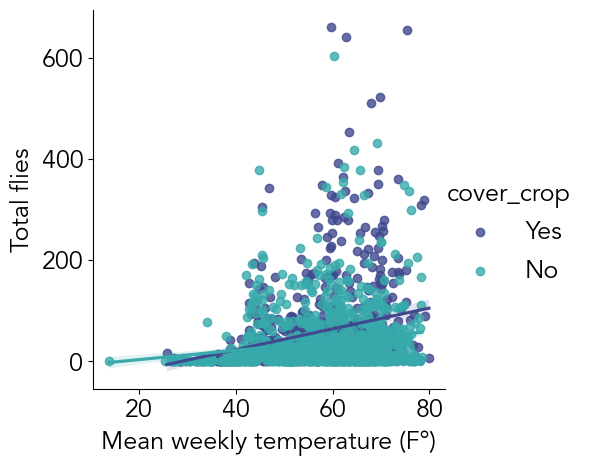

In [1055]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

sns.lmplot(data=sticky_cards_merged, x='tmean_f', y='total_flies', hue='cover_crop', fit_reg=True, palette='mako')
plt.xlabel('Mean weekly temperature (F°)')
plt.ylabel('Total flies')

plt.show()

In [1064]:
sticky_cards_merged.loc[sticky_cards_merged.previous_crop == 'Silage Corn', 'previous_crop'] = 'Corn'
sticky_cards_merged.loc[sticky_cards_merged.previous_crop == 'Grain Corn', 'previous_crop'] = 'Corn'
sticky_cards_merged.loc[sticky_cards_merged.previous_crop == 'Soybean', 'previous_crop'] = 'Soybean'
sticky_cards_merged.loc[(sticky_cards_merged.previous_crop != 'Corn') & (sticky_cards_merged.previous_crop != 'Soybean'), 'previous_crop'] = 'Other'

sticky_cards_merged

,card_id,field_id,date_collected,total_scm,scm_male,scm_female,florilega,season_total,male_total,female_total,...,prop_ag_current_year_500m,prop_nat_current_year_500m,prop_corn_current_year_1000m,prop_ag_current_year_1000m,prop_nat_current_year_1000m,previous_crop,cover_crop,manure,tillage,planting_date
0,2006.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
1,2005.0,DIP_FLE,2023-03-13,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
2,2008.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
3,2007.0,DIP_FLE,2023-03-21,0.0,0.0,0.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
4,2013.0,DIP_FLE,2023-03-28,23.0,14.0,9.0,0.0,1556.0,780.0,776.0,...,0.113880,0.039123,0.075598,0.151118,0.036402,Corn,Yes,No,No,2023-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,NaN,SMI_LAT_2,2024-05-13,57.0,36.0,21.0,9.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
893,NaN,SMI_LAT_2,2024-05-20,50.0,30.0,20.0,4.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
894,NaN,SMI_LAT_2,2024-05-31,231.0,134.0,97.0,22.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02
895,NaN,SMI_LAT_2,2024-06-06,181.0,103.0,78.0,12.0,818.0,465.0,353.0,...,0.210736,0.531630,0.117744,0.208092,0.355273,Corn,Yes,Yes,Yes,2024-05-02


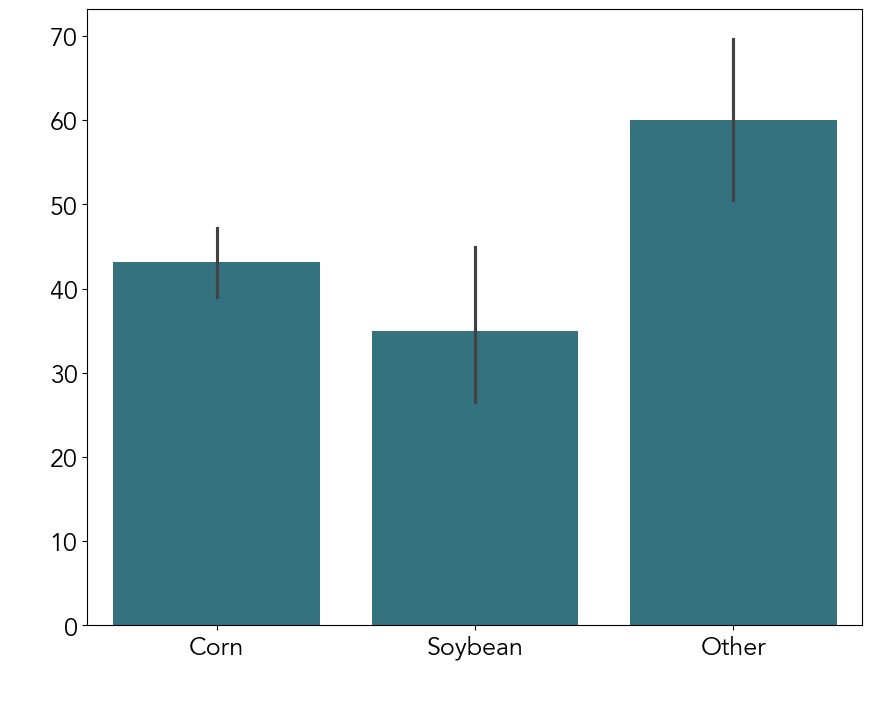

In [1065]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))

plt.rcParams.update({'font.size': 18})

sns.barplot(
    data=sticky_cards_merged.reset_index(), x="previous_crop", y="total_flies",color="#287a8c"
)

plt.xlabel(' ', labelpad=10)
plt.ylabel(' ', labelpad=10)
#plt.xlabel('Seed type', labelpad=10)
#plt.ylabel('Proportion seeds damaged by $\it{D. platura}$', labelpad=10)
#plt.ylim(0, 0.2)
#plt.title('$\it{D. platura}$ larvae in traps')
#plt.savefig('Figures/cover_crop.png')
plt.show()

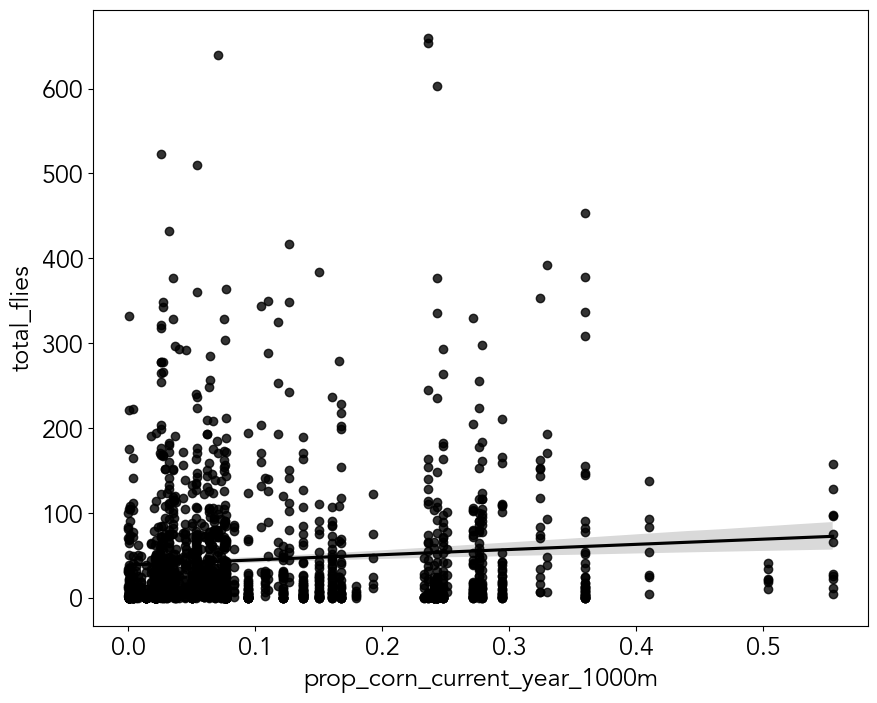

In [1068]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_current_year_1000m', y='total_flies', fit_reg=True, color='black')
#plt.xlabel('Proportion corn in previous year (1000m)')
#plt.ylabel('Proportion corn in current year (1000m)')

plt.show()

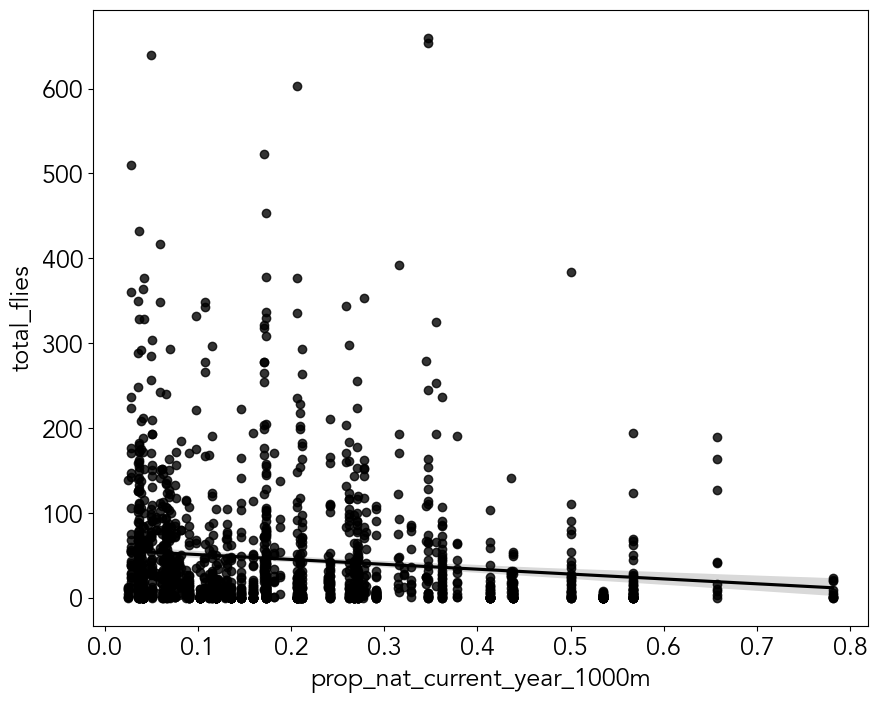

In [1069]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_nat_current_year_1000m', y='total_flies', fit_reg=True, color='black')
#plt.xlabel('Proportion corn in previous year (1000m)')
#plt.ylabel('Proportion corn in current year (1000m)')

plt.show()

# Supplementary Figures

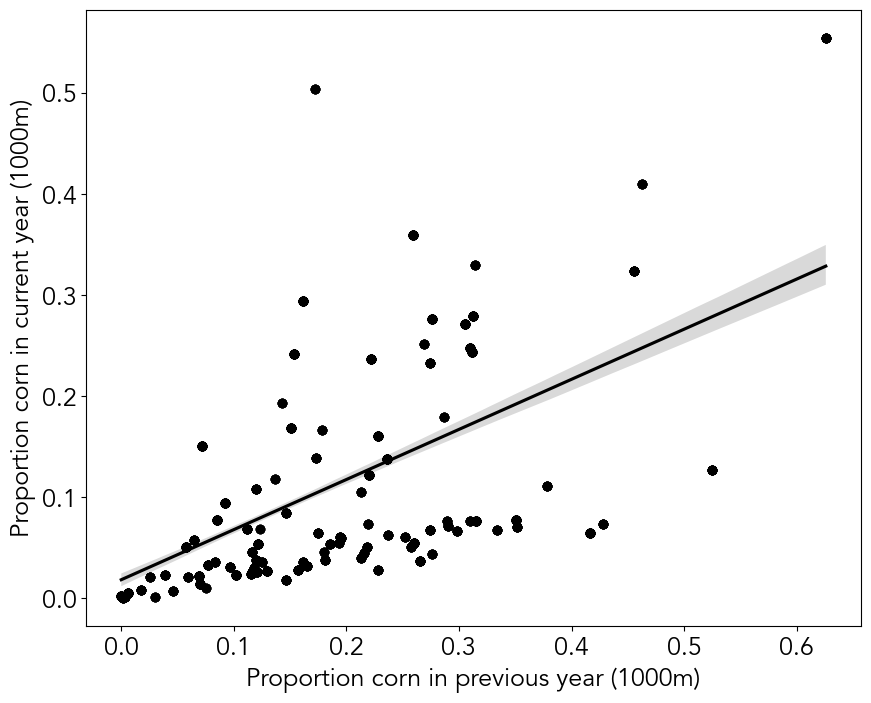

In [1056]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_previous_year_1000m', y='prop_corn_current_year_1000m', fit_reg=True, color='black')
plt.xlabel('Proportion corn in previous year (1000m)')
plt.ylabel('Proportion corn in current year (1000m)')

plt.show()

In [869]:
stats.pearsonr(sticky_cards_merged['prop_corn_current_year_1000m'], sticky_cards_merged['prop_ag_current_year_1000m'])

PearsonRResult(statistic=0.8248946608992207, pvalue=0.0)

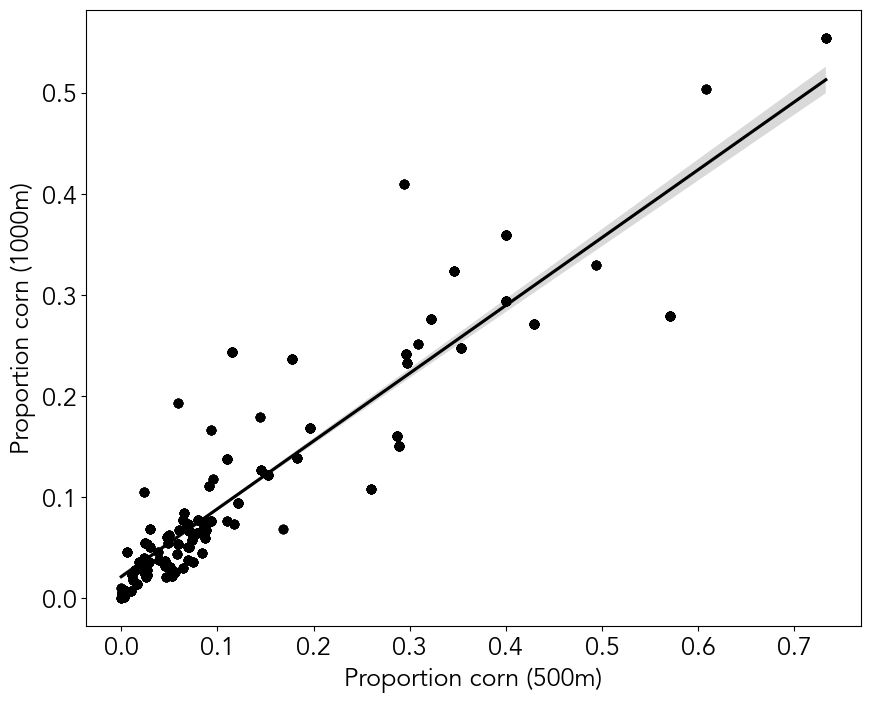

In [882]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_current_year_500m', y='prop_corn_current_year_1000m', fit_reg=True, color='black')
plt.xlabel('Proportion corn (500m)')
plt.ylabel('Proportion corn (1000m)')

plt.show()

In [883]:
stats.pearsonr(sticky_cards_merged['prop_corn_current_year_500m'], sticky_cards_merged['prop_corn_current_year_1000m'])

PearsonRResult(statistic=0.9140903487835405, pvalue=0.0)

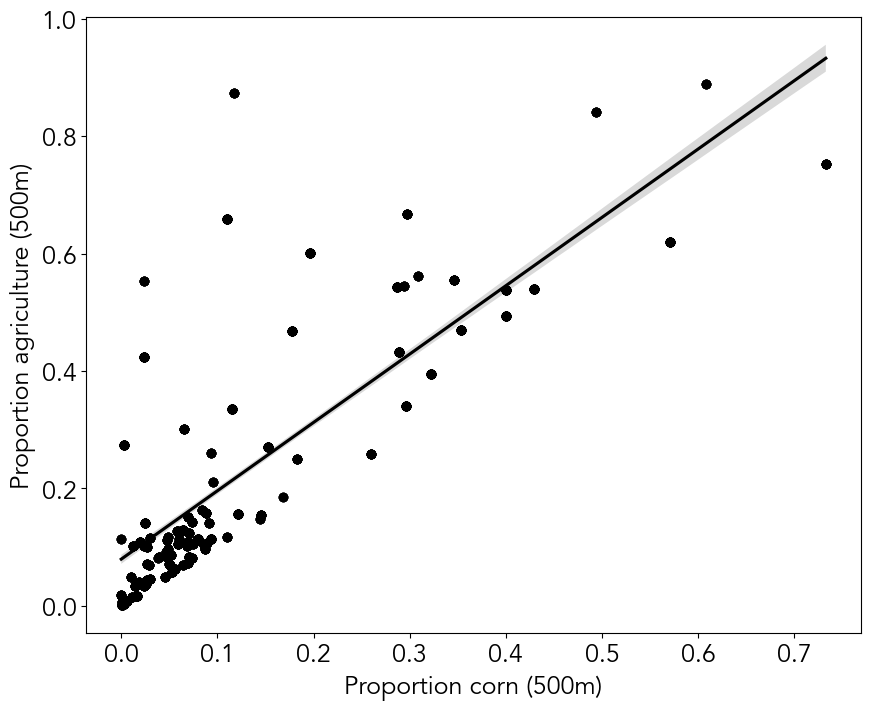

In [876]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_current_year_500m', y='prop_ag_current_year_500m', fit_reg=True, color='black')
plt.xlabel('Proportion corn (500m)')
plt.ylabel('Proportion agriculture (500m)')

plt.show()

In [870]:
stats.pearsonr(sticky_cards_merged['prop_corn_current_year_500m'], sticky_cards_merged['prop_ag_current_year_500m'])

PearsonRResult(statistic=0.8030594692419111, pvalue=0.0)

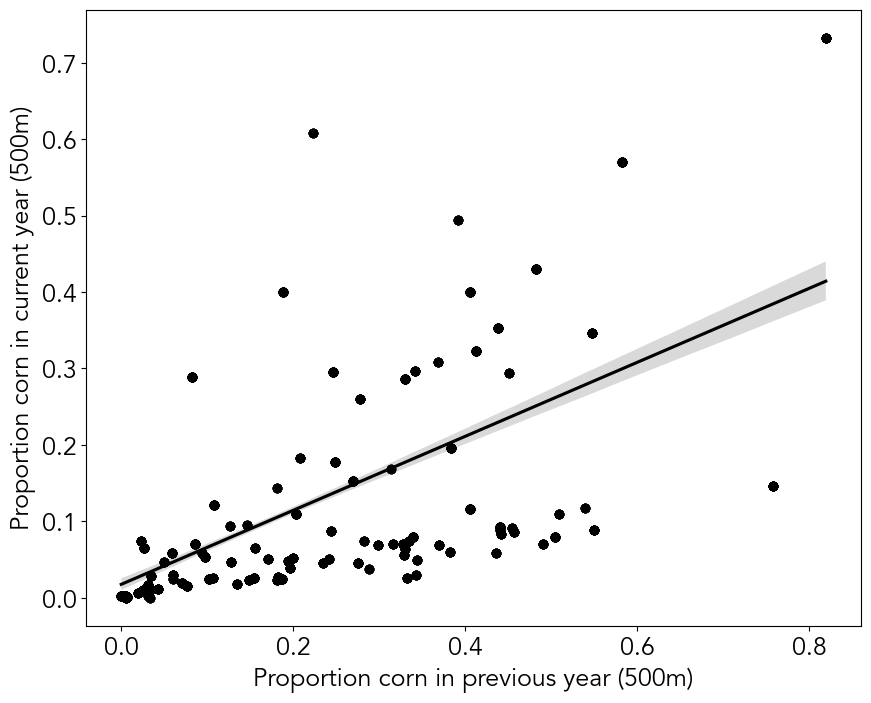

In [875]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_previous_year_500m', y='prop_corn_current_year_500m', fit_reg=True, color='black')
plt.xlabel('Proportion corn in previous year (500m)')
plt.ylabel('Proportion corn in current year (500m)')

plt.show()

In [878]:
stats.pearsonr(sticky_cards_merged['prop_corn_previous_year_500m'], sticky_cards_merged['prop_corn_current_year_500m'])

PearsonRResult(statistic=0.5892120263151274, pvalue=4.837680148673532e-162)

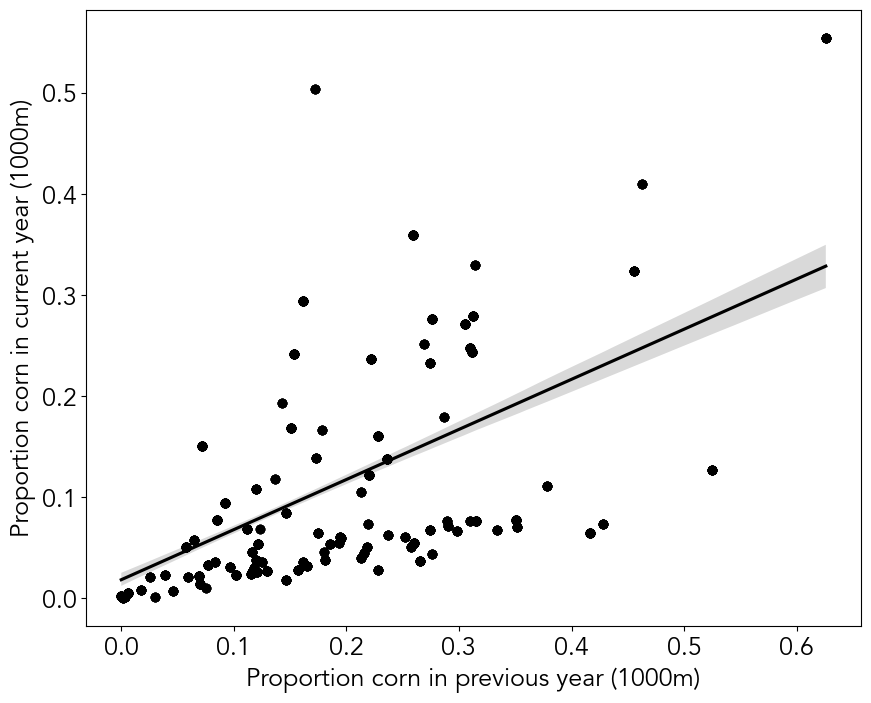

In [879]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_corn_previous_year_1000m', y='prop_corn_current_year_1000m', fit_reg=True, color='black')
plt.xlabel('Proportion corn in previous year (1000m)')
plt.ylabel('Proportion corn in current year (1000m)')

plt.show()

In [880]:
stats.pearsonr(sticky_cards_merged['prop_corn_previous_year_1000m'], sticky_cards_merged['prop_corn_current_year_1000m'])

PearsonRResult(statistic=0.5600700900821799, pvalue=2.870022417670754e-143)

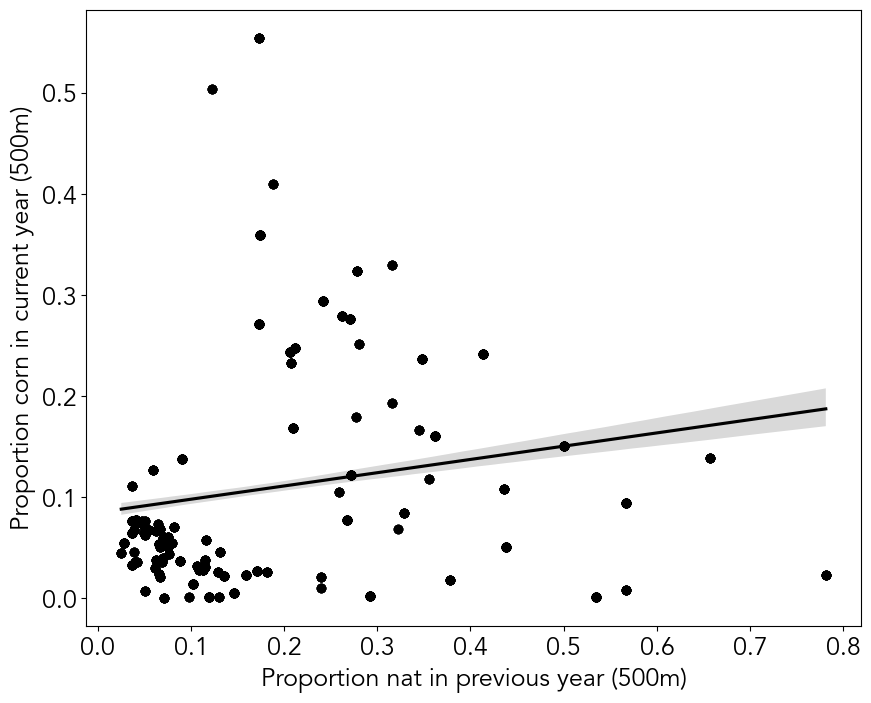

In [1071]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_nat_current_year_1000m', y='prop_corn_current_year_1000m', fit_reg=True, color='black')
plt.xlabel('Proportion nat in previous year (500m)')
plt.ylabel('Proportion corn in current year (500m)')

plt.show()

In [1072]:
stats.pearsonr(sticky_cards_merged['prop_nat_current_year_1000m'], sticky_cards_merged['prop_corn_current_year_1000m'])

PearsonRResult(statistic=0.18883443636223957, pvalue=2.465908049759168e-15)

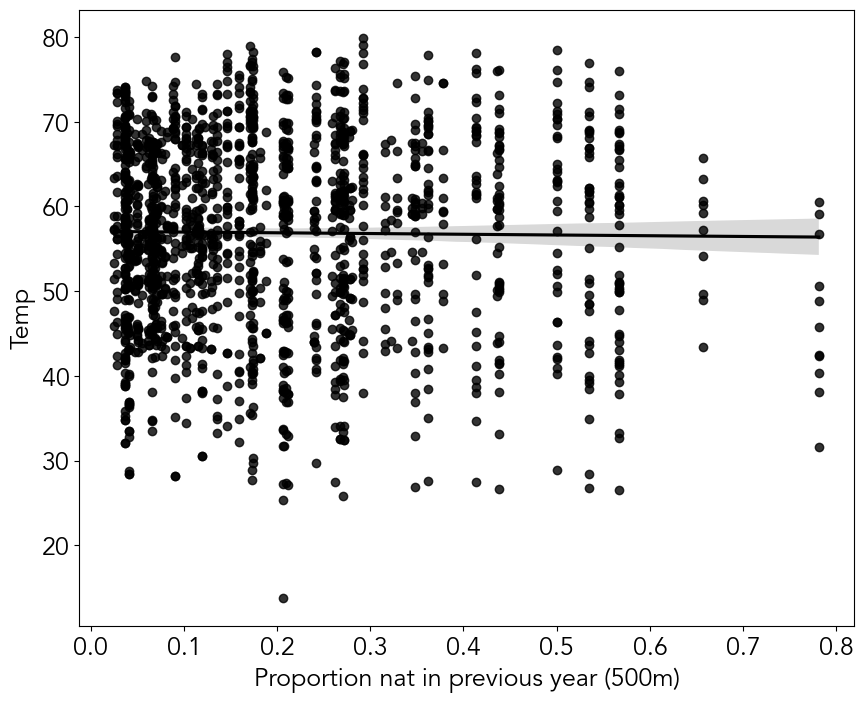

In [1073]:
plt.rcParams['font.sans-serif'] = ['Avenir']
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 18})

ax = sns.regplot(data=sticky_cards_merged, x='prop_nat_current_year_1000m', y='tmean_f', fit_reg=True, color='black')
plt.xlabel('Proportion nat in previous year (500m)')
plt.ylabel('Temp')

plt.show()